In [1]:
import numpy as np
from src.run_shap import load_shap_vals
import pickle
from tqdm import tqdm
from src.utils import token_segments
from src.dataset_info import get_dataset_info
from transformers import AutoTokenizer
import shap


/home/james/CodingProjects/TextNTabularExplanations/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
text_model_base = "distilbert-base-uncased"
text_model_code = "disbert"


## Colon and column names separated

In [3]:
tab_scale_factor = 1

for ds_name in [
    "fake",
    # "jigsaw",
    # "kick",
    # "wine",
    # "imdb_genre",
    # "prod_sent"
]:
    tab_scale_factor = 1
    di = get_dataset_info(ds_name)
    tokenizer = AutoTokenizer.from_pretrained(text_model_base)

    pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    col_name_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/col_names_shap_vals_all_text_baseline.pkl"
    colon_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/colon_shap_vals_all_text_baseline.pkl"
    fts_filepath = f"../models/shap_vals_{text_model_code}{pre}/{ds_name}/summed_shap_vals_all_text_baseline.pkl"

    tab_pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    print(
        f"""
        #################
        {ds_name}
        #################
        """
    )
    with open(col_name_filepath, "rb") as f:
        grouped_col_name_shap_vals = pickle.load(f)
    with open(colon_filepath, "rb") as f:
        grouped_colon_shap_vals = pickle.load(f)
    with open(fts_filepath, "rb") as f:
        grouped_shap_vals = pickle.load(f)
    val_only = grouped_shap_vals - grouped_col_name_shap_vals - grouped_colon_shap_vals
    # shap.summary_plot(
    #     list(
    #         np.concatenate(
    #             [
    #                 val_only,
    #                 grouped_col_name_shap_vals,
    #                 grouped_colon_shap_vals,
    #             ],
    #             axis=2,
    #         )
    #     ),
    #     features=[f"(Tab Val) {col}" for col in di.tab_cols]
    #     + [f"(Text Val) {col}" for col in di.text_cols]
    #     + [f"(Tab Col) {col}" for col in di.tab_cols]
    #     + [f"(Text Col) {col}" for col in di.text_cols]
    #     + [f"(Tab Colon) {col}" for col in di.tab_cols]
    #     + [f"(Text Colon) {col}" for col in di.text_cols],
    #     class_names=di.label_names,
    # )



        #################
        fake
        #################
        


No model type specified for fake. (This is fine during dataset creation)


In [45]:
def summary_plot(ds_name, text_model_code, tab_scale_factor=2):
    di = get_dataset_info(ds_name)
    tab_pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
    _, names = load_shap_vals(
        ds_name, tab_scale_factor=tab_scale_factor, text_model_code=text_model_code
    )
    for name in names:
        print(
            f"""
            #################
            {name}
            #################
            """
        )
        filepath = f"../models/shap_vals{tab_pre}/{ds_name}/summed_shap_vals_{name}.pkl"
        with open(filepath, "rb") as f:
            grouped_shap_vals = pickle.load(f)
        shap.summary_plot(
            list(grouped_shap_vals),
            features=[f"(Tab ft) {col}" for col in di.tab_cols]
            + [f"(Text ft) {col}" for col in di.text_cols],
            class_names=di.label_names,
        )


tab_scale_factor = 1
results = {}
for text_model_code in [
    "disbert",
    "bert",
    "drob",
    "deberta",
]:
    for ds_name in [
        "prod_sent",
        "kick",
        "jigsaw",
        "wine",
        "fake",
        "imdb_genre",
        "channel",
        "airbnb",
        "salary",
    ]:  #
        # summary_plot(ds_name)
        print(f"################# \n{ds_name} \n#################")
        di = get_dataset_info(ds_name)
        tab_pre = f"_sf{tab_scale_factor}" if tab_scale_factor != 2 else ""
        for name in [
            "ensemble_25",
            "ensemble_50",
            "ensemble_75",
            "stack",
            "all_text",
        ]:
            print(
                f"""
                #################
                {name}
                #################
                """
            )
            filepath = f"../models/shap_vals_{text_model_code}{tab_pre}/{ds_name}/summed_shap_vals_{name}.pkl"
            with open(filepath, "rb") as f:
                grouped_shap_vals = pickle.load(f)
            mean_abs = np.mean(np.abs(grouped_shap_vals), axis=(0, 1))
            cols = [f"(Tab) {col}" for col in di.tab_cols] + [
                f"(Text) {col}" for col in di.text_cols
            ]
            sorted_vals, sorted_cols = zip(
                *sorted(zip(mean_abs, cols), reverse=True))
            results[(text_model_code, ds_name, name)] = (
                sorted_vals, sorted_cols)

        name = "all_text_baseline"
        col_name_filepath = f"../models/shap_vals_{text_model_code}{tab_pre}/{ds_name}/col_names_shap_vals_all_text_baseline.pkl"
        colon_filepath = f"../models/shap_vals_{text_model_code}{tab_pre}/{ds_name}/colon_shap_vals_all_text_baseline.pkl"
        fts_filepath = f"../models/shap_vals_{text_model_code}{tab_pre}/{ds_name}/summed_shap_vals_all_text_baseline.pkl"

        print(
            f"""
            #################
            {ds_name}
            #################
            """
        )
        with open(col_name_filepath, "rb") as f:
            grouped_col_name_shap_vals = pickle.load(f)
        with open(colon_filepath, "rb") as f:
            grouped_colon_shap_vals = pickle.load(f)
        with open(fts_filepath, "rb") as f:
            grouped_shap_vals = pickle.load(f)
        val_only = (
            grouped_shap_vals - grouped_col_name_shap_vals - grouped_colon_shap_vals
        )
        grouped_template = np.mean(
            grouped_shap_vals - val_only, axis=2, keepdims=True)

        cols = (
            [f"(Tab) {col}" for col in di.tab_cols]
            + [f"(Text) {col}" for col in di.text_cols]
            + ["Template"]
        )
        mean_abs = np.mean(
            np.abs(
                np.concatenate(
                    [
                        val_only,
                        grouped_template,
                    ],
                    axis=2,
                )
            ),
            axis=(0, 1),
        )
        sorted_vals, sorted_cols = zip(
            *sorted(zip(mean_abs, cols), reverse=True))
        results[(text_model_code, ds_name, name)] = (sorted_vals, sorted_cols)

################# 
prod_sent 
#################

                #################
                ensemble_25
                #################
                

                #################
                ensemble_50
                #################
                

                #################
                ensemble_75
                #################
                

                #################
                stack
                #################
                

                #################
                all_text
                #################
                

            #################
            prod_sent
            #################
            
################# 
kick 
#################

                #################
                ensemble_25
                #################
                

                #################
                ensemble_50
                #################
                

                #######

No model type specified for prod_sent. (This is fine during dataset creation)
No model type specified for kick. (This is fine during dataset creation)
No model type specified for jigsaw. (This is fine during dataset creation)
No model type specified for wine. (This is fine during dataset creation)
No model type specified for fake. (This is fine during dataset creation)
No model type specified for imdb_genre. (This is fine during dataset creation)
No model type specified for channel. (This is fine during dataset creation)
No model type specified for airbnb. (This is fine during dataset creation)
No model type specified for salary. (This is fine during dataset creation)


In [5]:
results

{('disbert',
  'prod_sent',
  'ensemble_25'): ((0.15817057563125902,
   0.056952070586703485), ('(Tab) Product_Type', '(Text) Product_Description')),
 ('disbert',
  'prod_sent',
  'ensemble_50'): ((0.11390414117340697,
   0.10544705042083927), ('(Text) Product_Description', '(Tab) Product_Type')),
 ('disbert',
  'prod_sent',
  'ensemble_75'): ((0.17085621176011045,
   0.0527235252104197), ('(Text) Product_Description', '(Tab) Product_Type')),
 ('disbert',
  'prod_sent',
  'stack'): ((0.21738999359099453,
   0.023137547050739064), ('(Tab) Product_Type',
   '(Text) Product_Description')),
 ('disbert',
  'prod_sent',
  'all_text'): ((0.2138180292673002,
   0.09332078331093652), ('(Tab) Product_Type', '(Text) Product_Description')),
 ('disbert',
  'prod_sent',
  'all_text_baseline'): ((0.2118252405175993,
   0.11656600526433972,
   0.02032446036247117), ('(Tab) Product_Type',
   '(Text) Product_Description',
   'Template')),
 ('disbert',
  'kick',
  'ensemble_25'): ((0.06240142817088862,
 

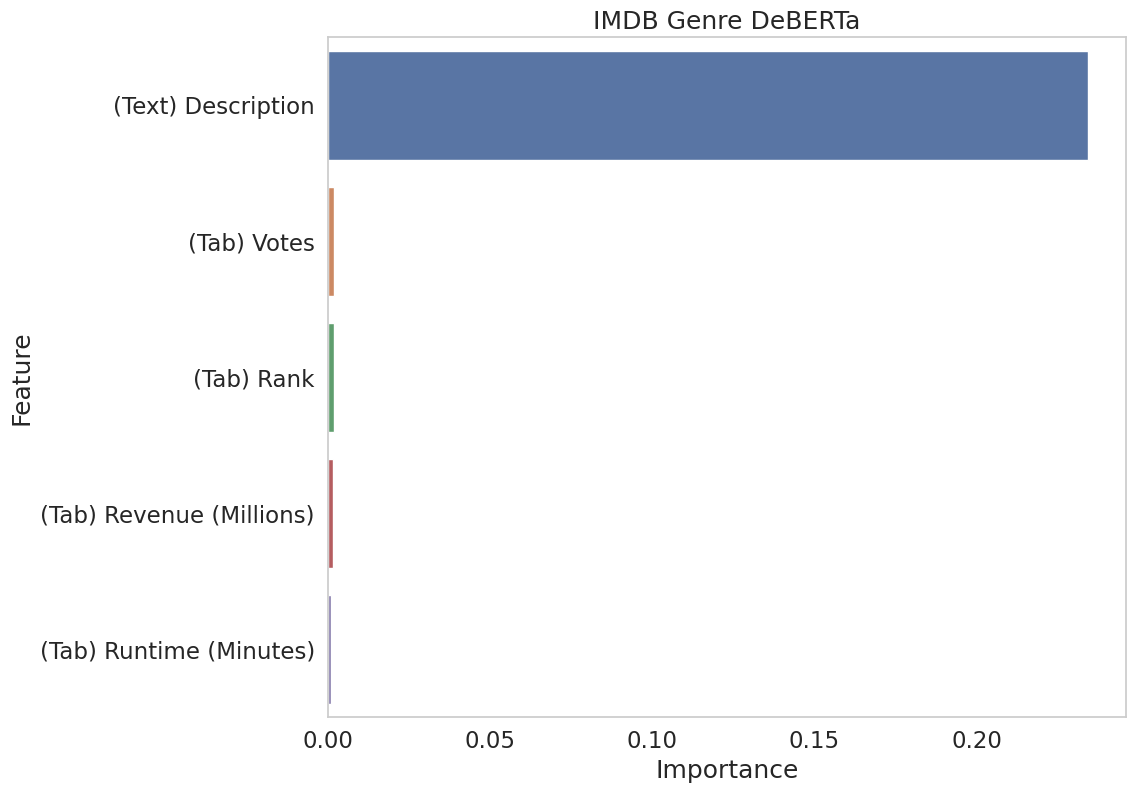

In [6]:
# Plot a bar graph of the top 10 features for each dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rcParams

rcParams.update({"figure.autolayout": True})
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {"axes.grid": False})

vals, cols = results[("deberta", "imdb_genre", "all_text")]

df = pd.DataFrame({"Feature": cols[:5], "Importance": vals[:5]})
ax = sns.barplot(x="Importance", y="Feature", data=df)
ax.set_title("IMDB Genre DeBERTa")
# plt.savefig("imdb_genre_deberta.png")
plt.show()


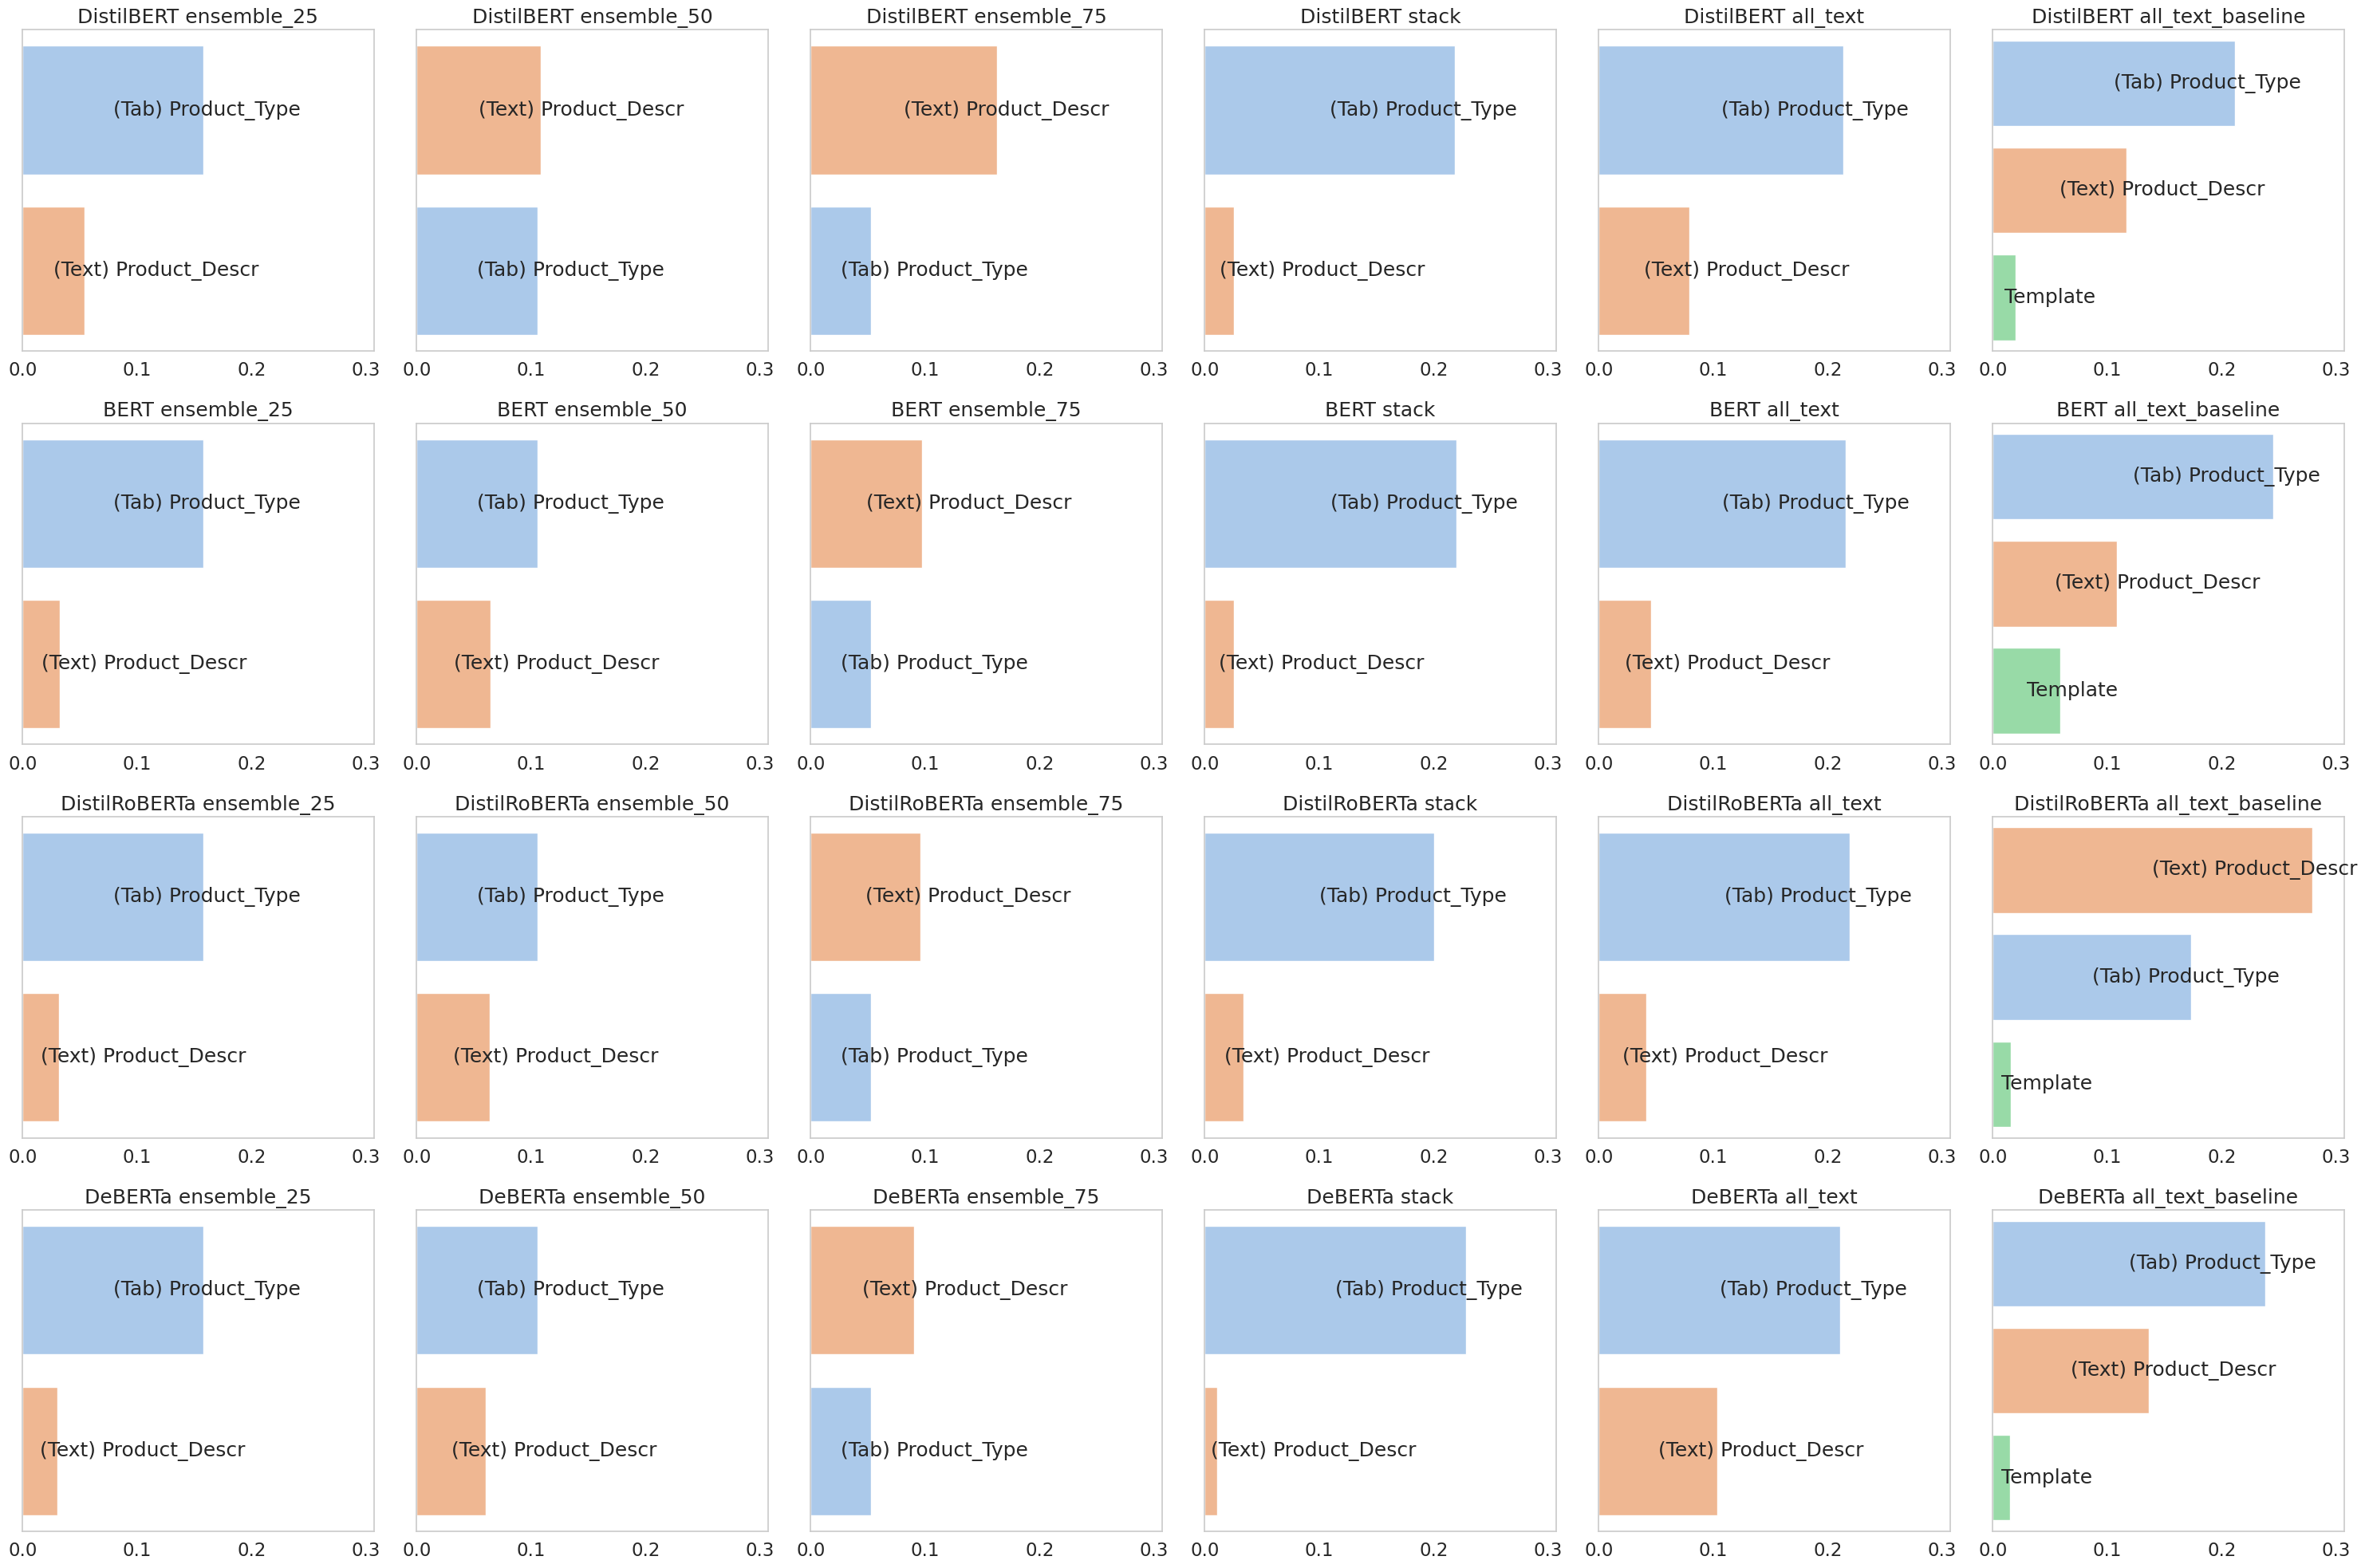

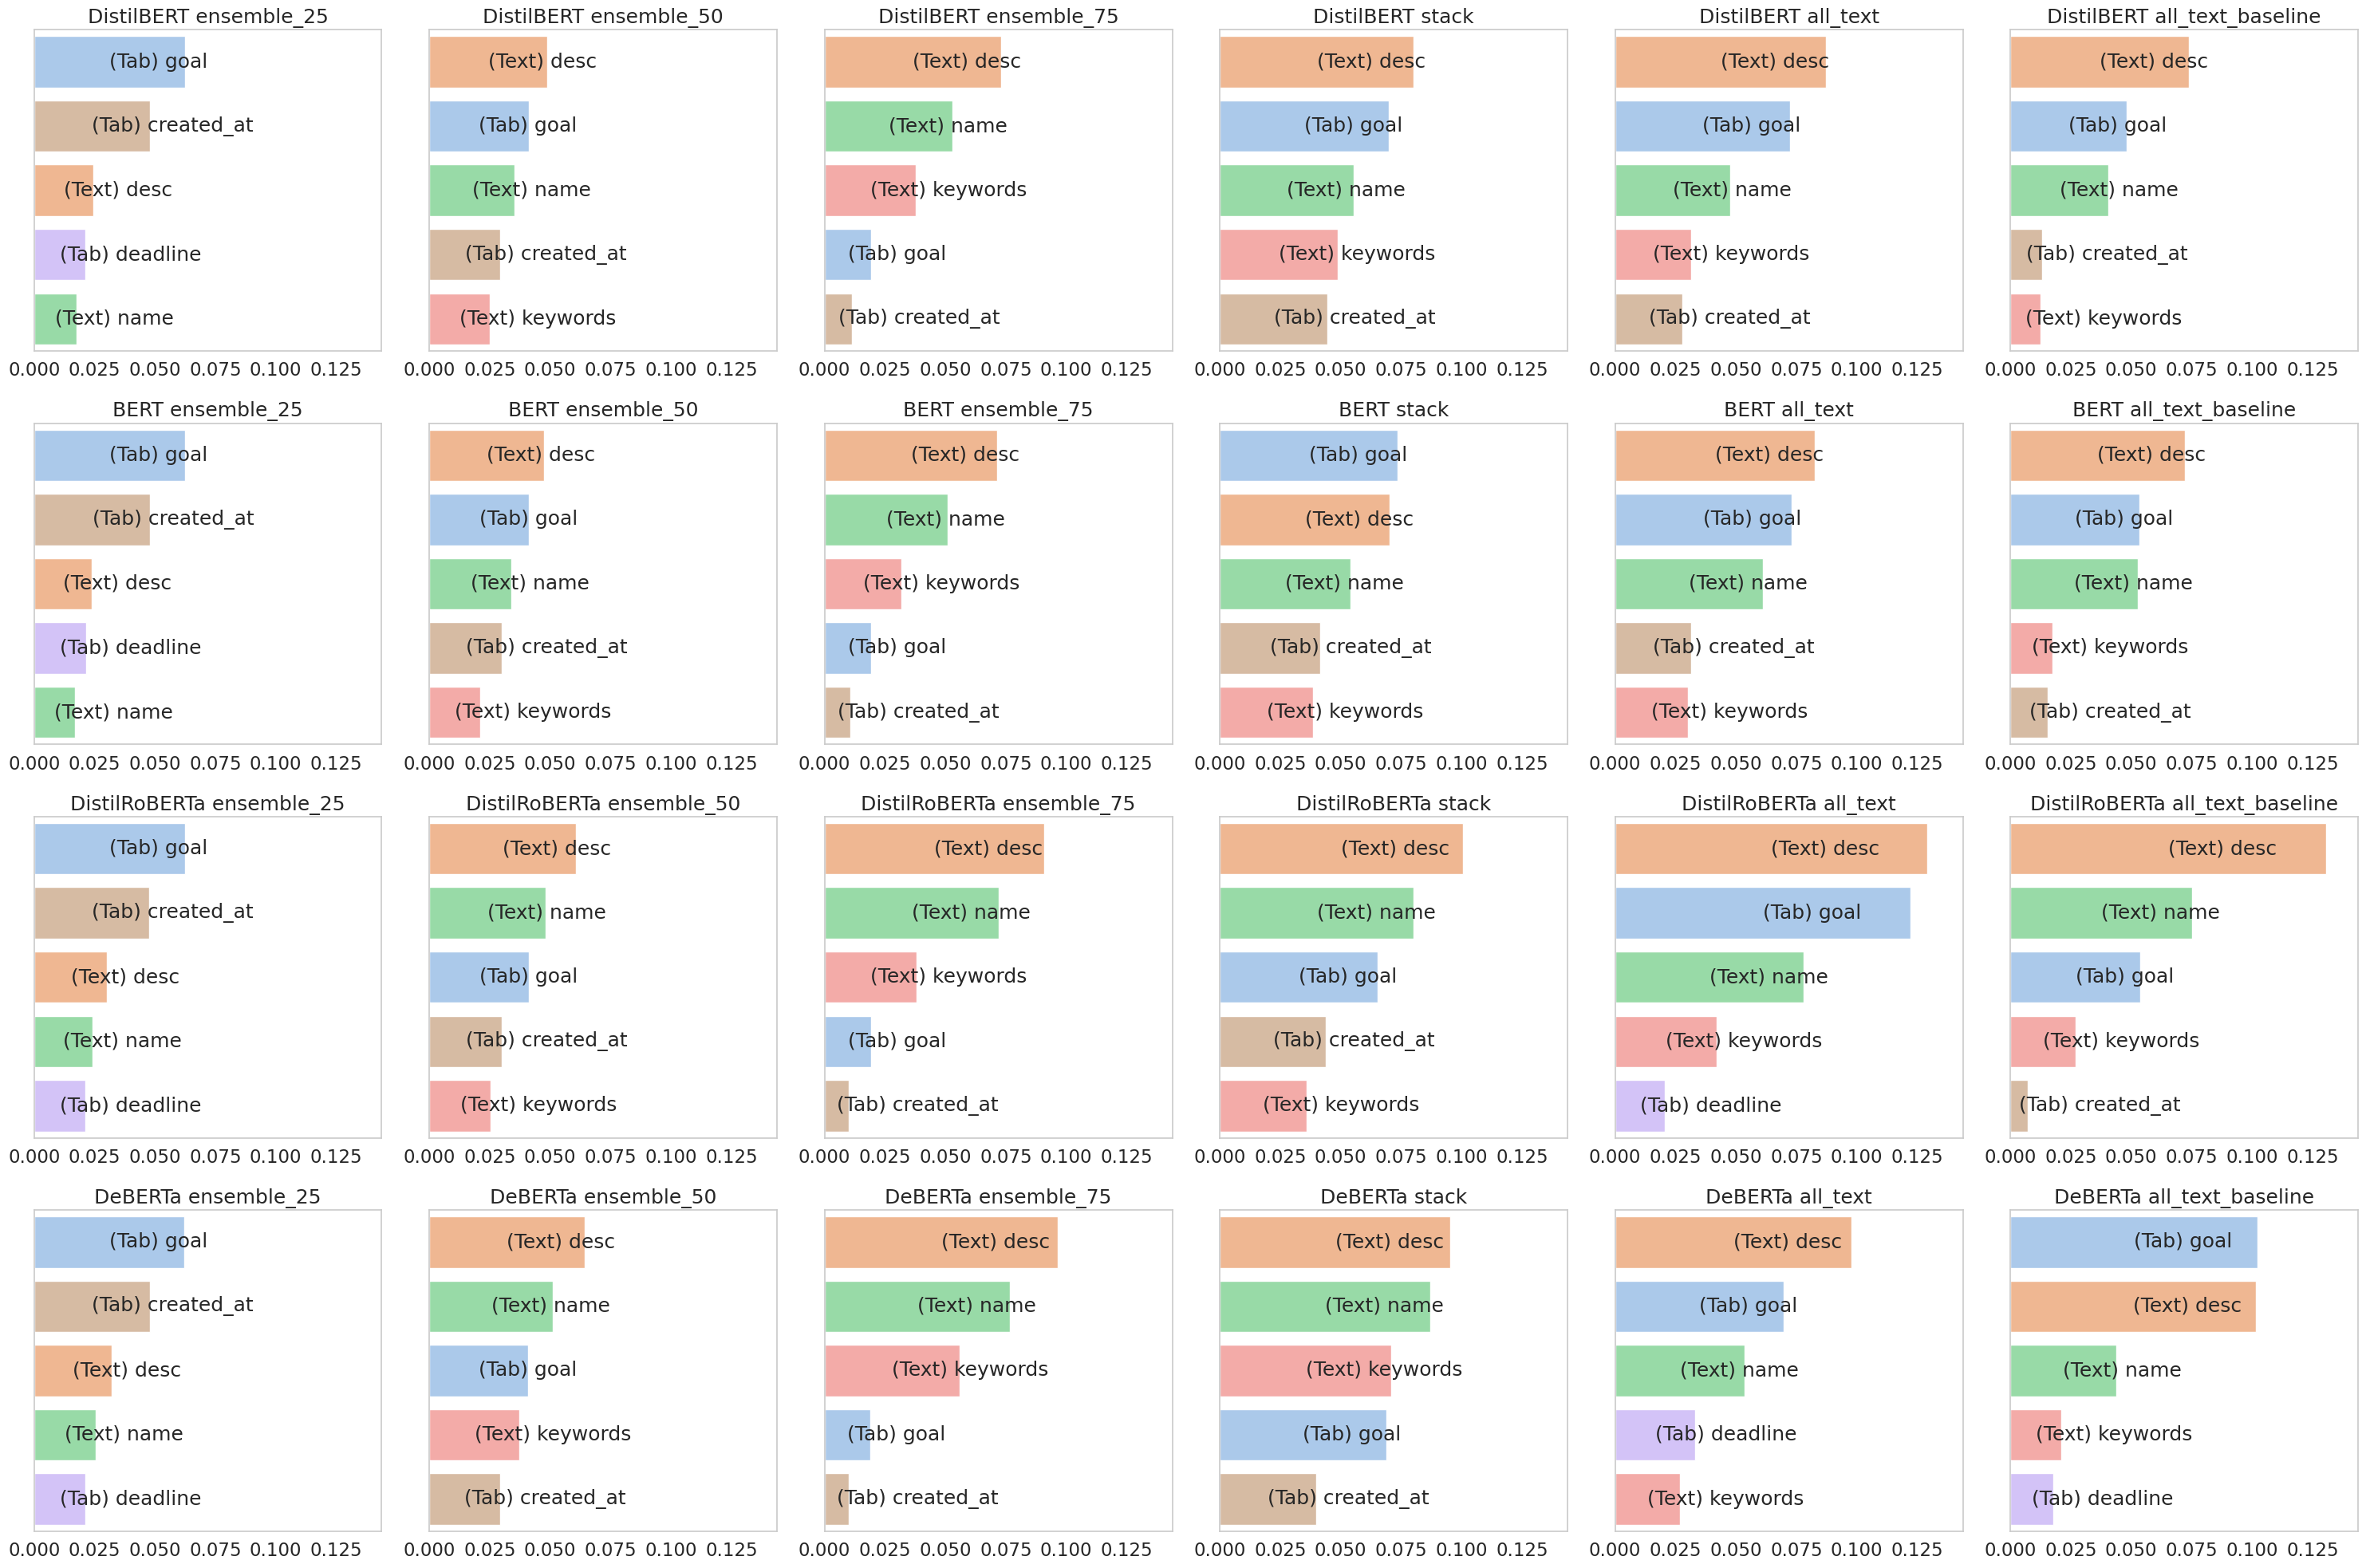

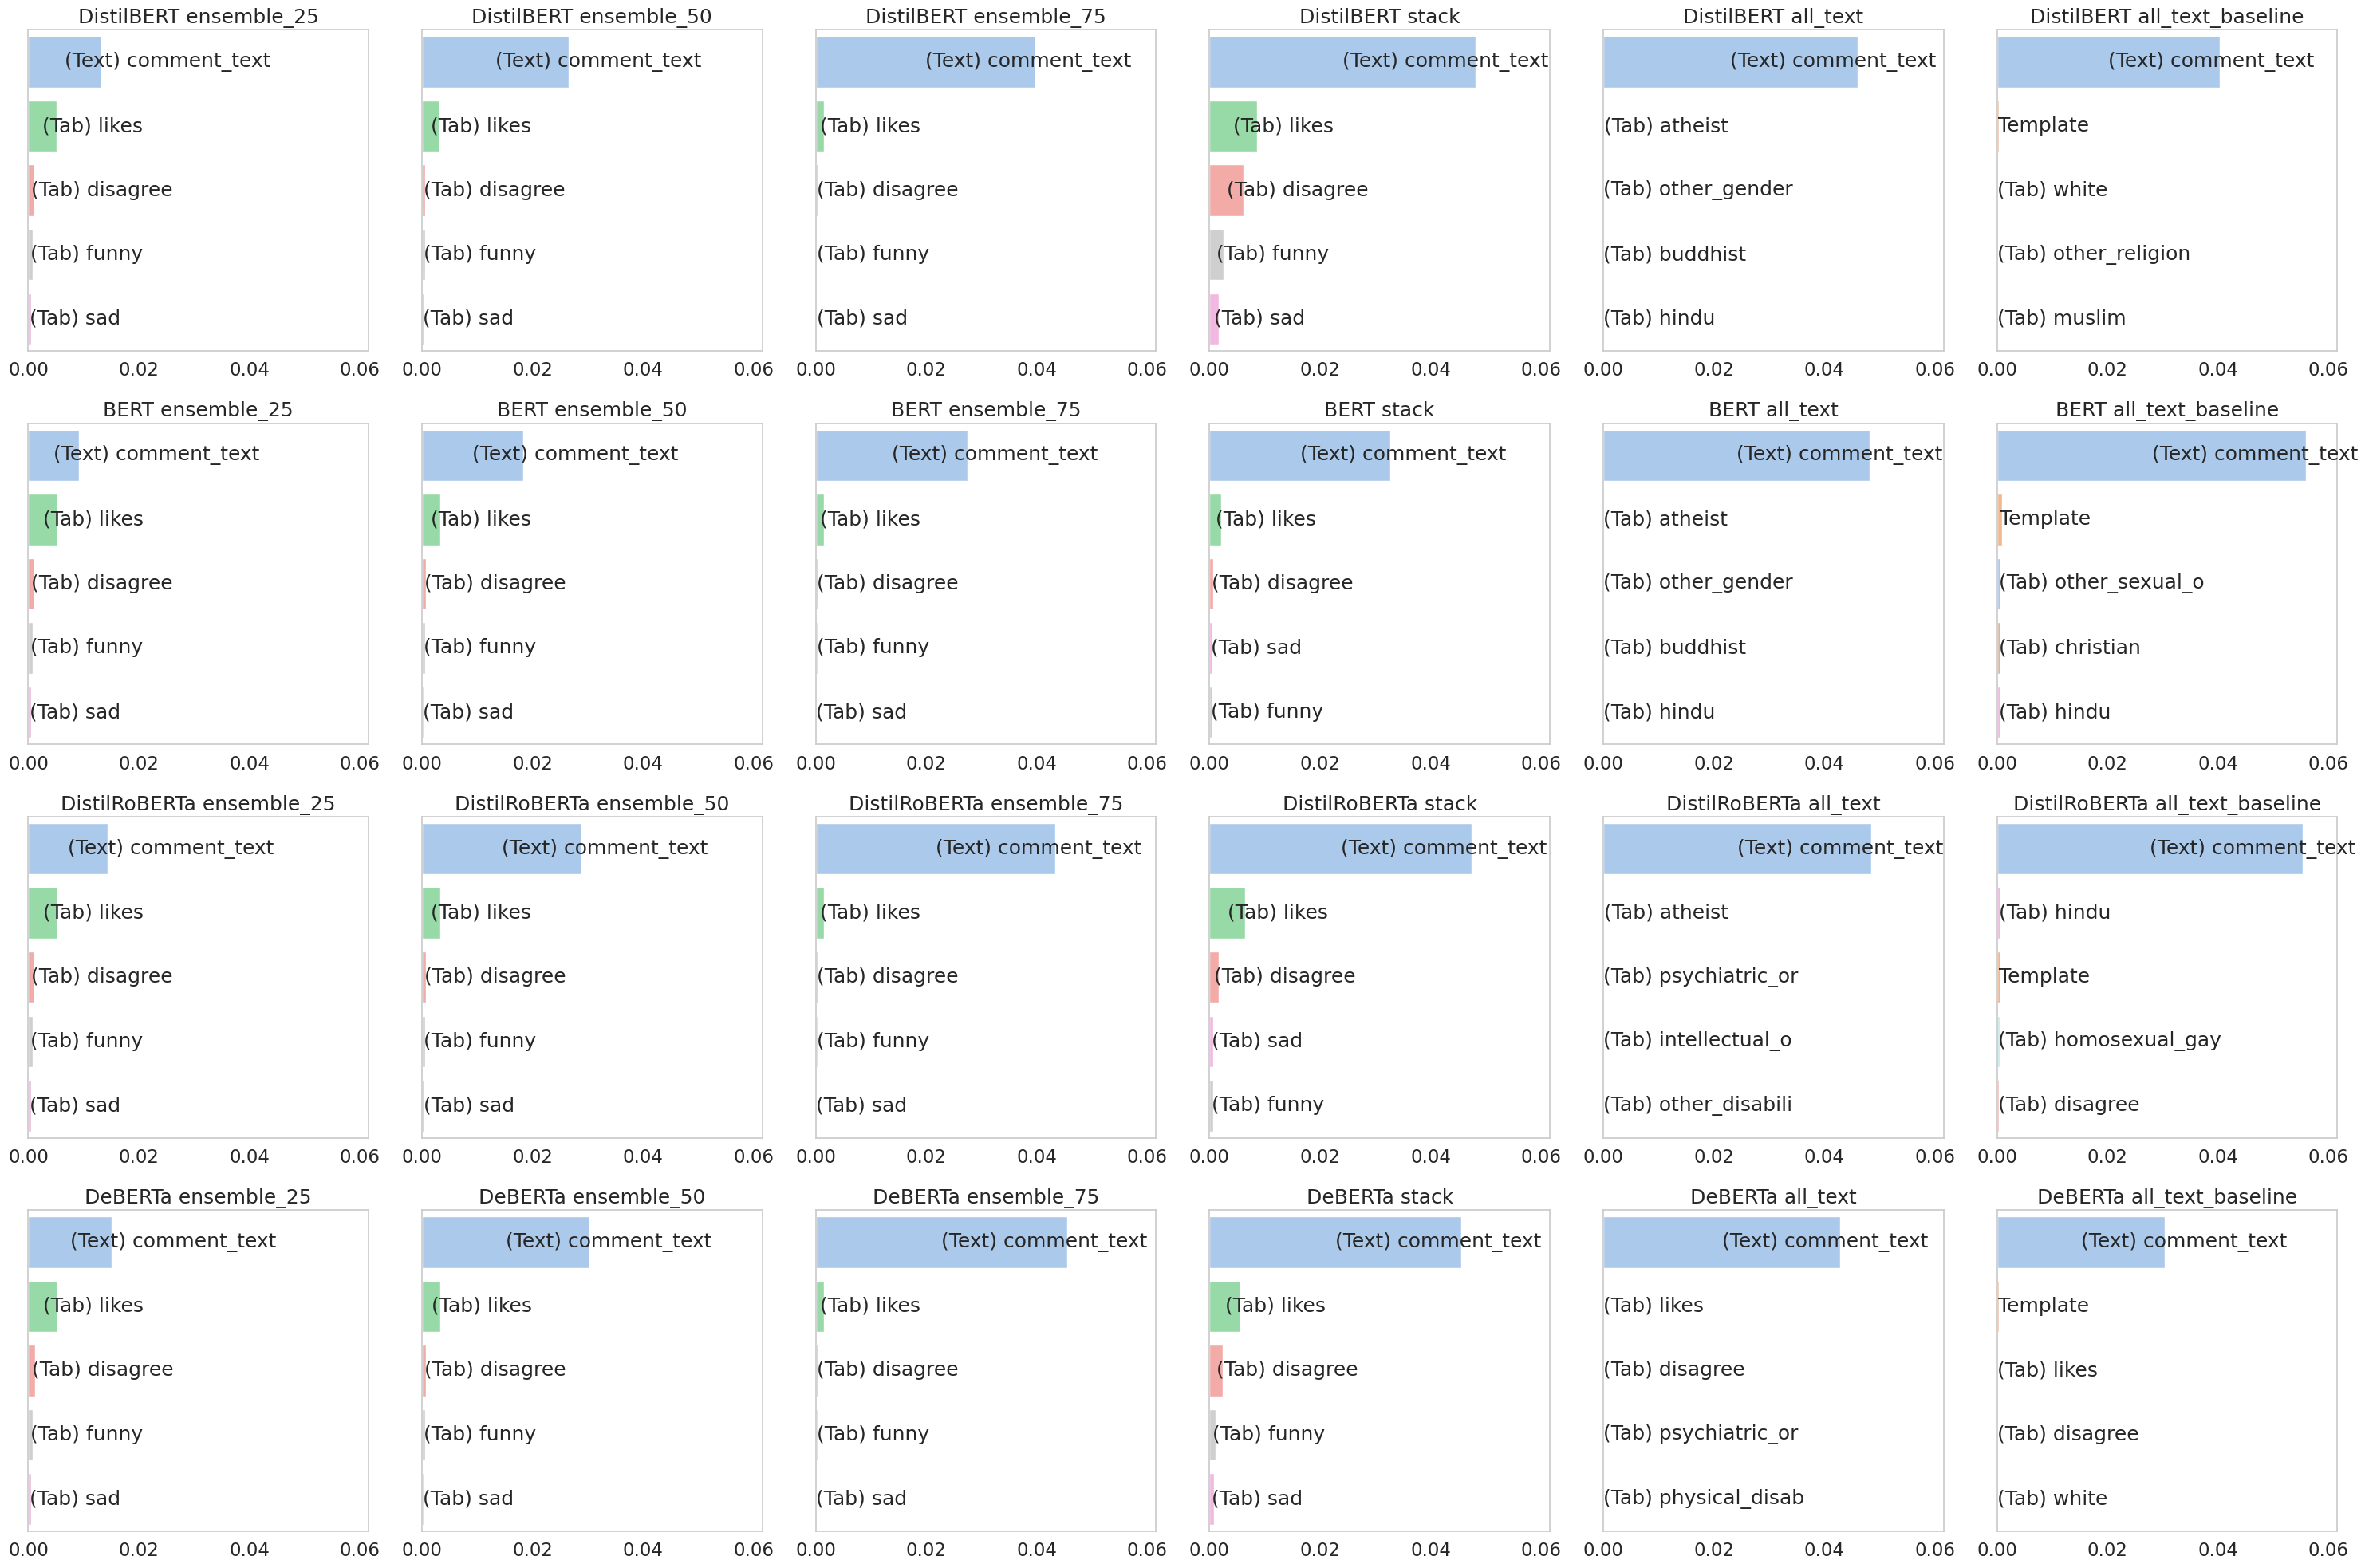

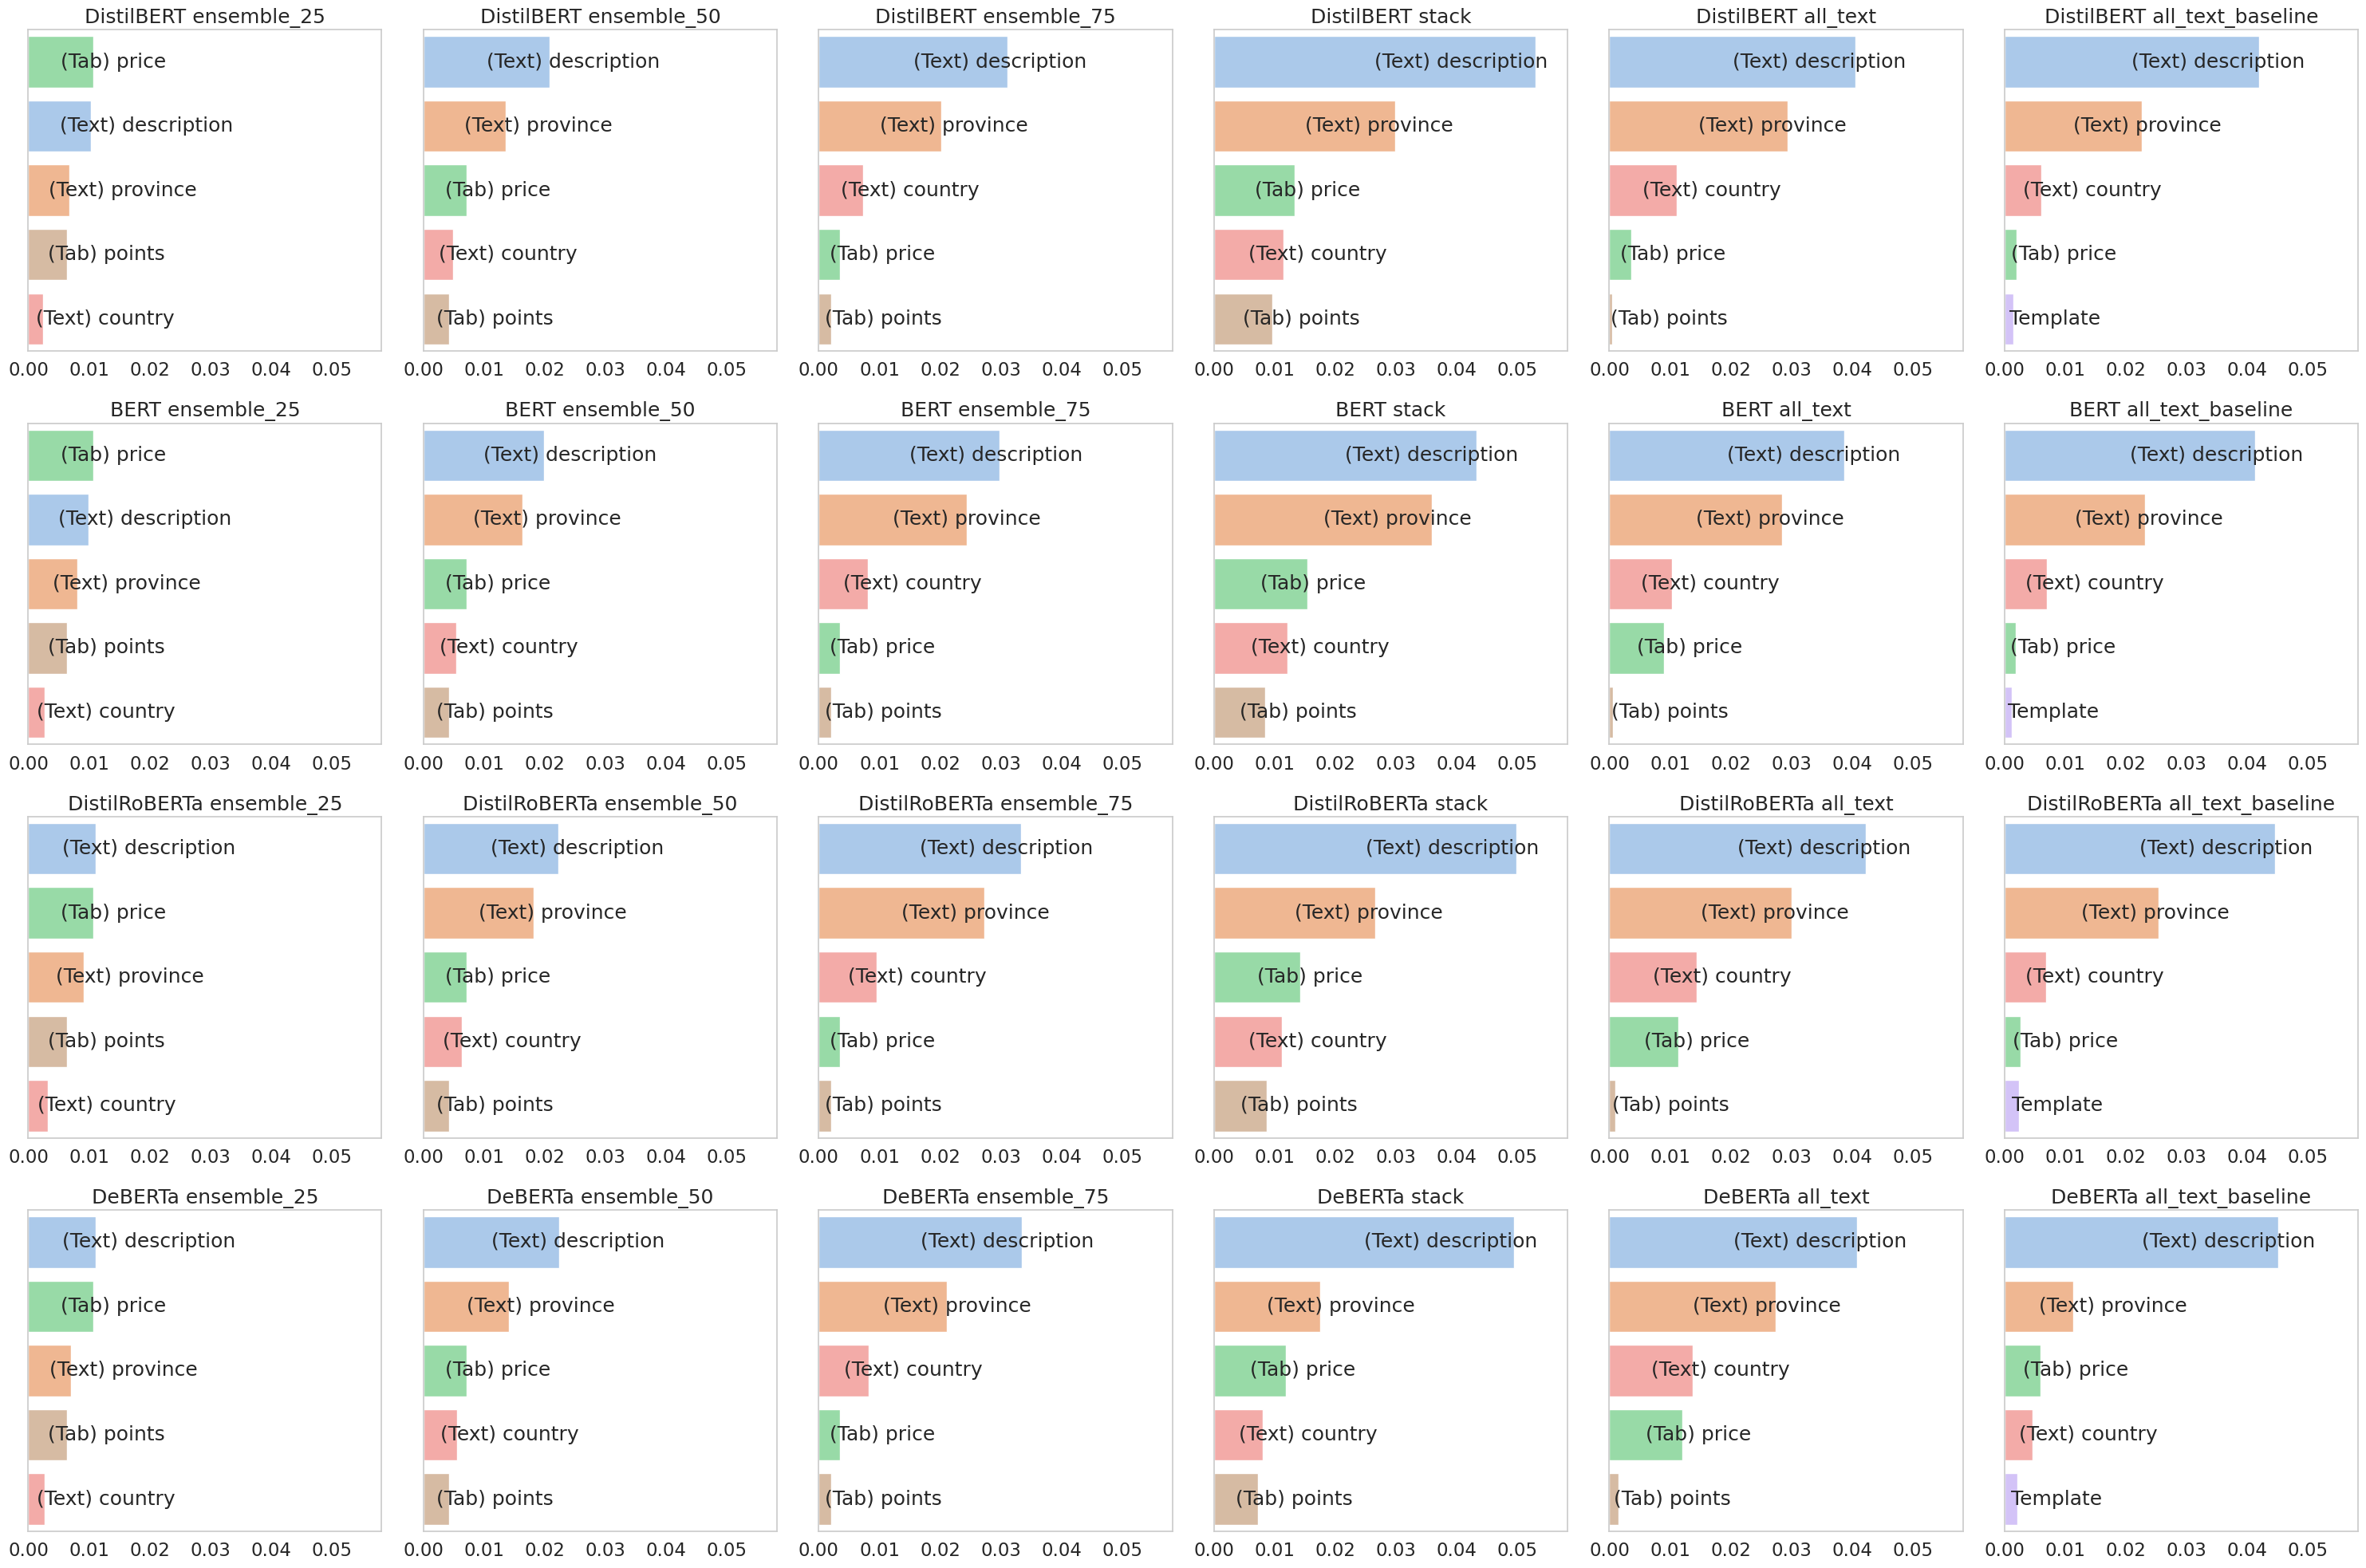

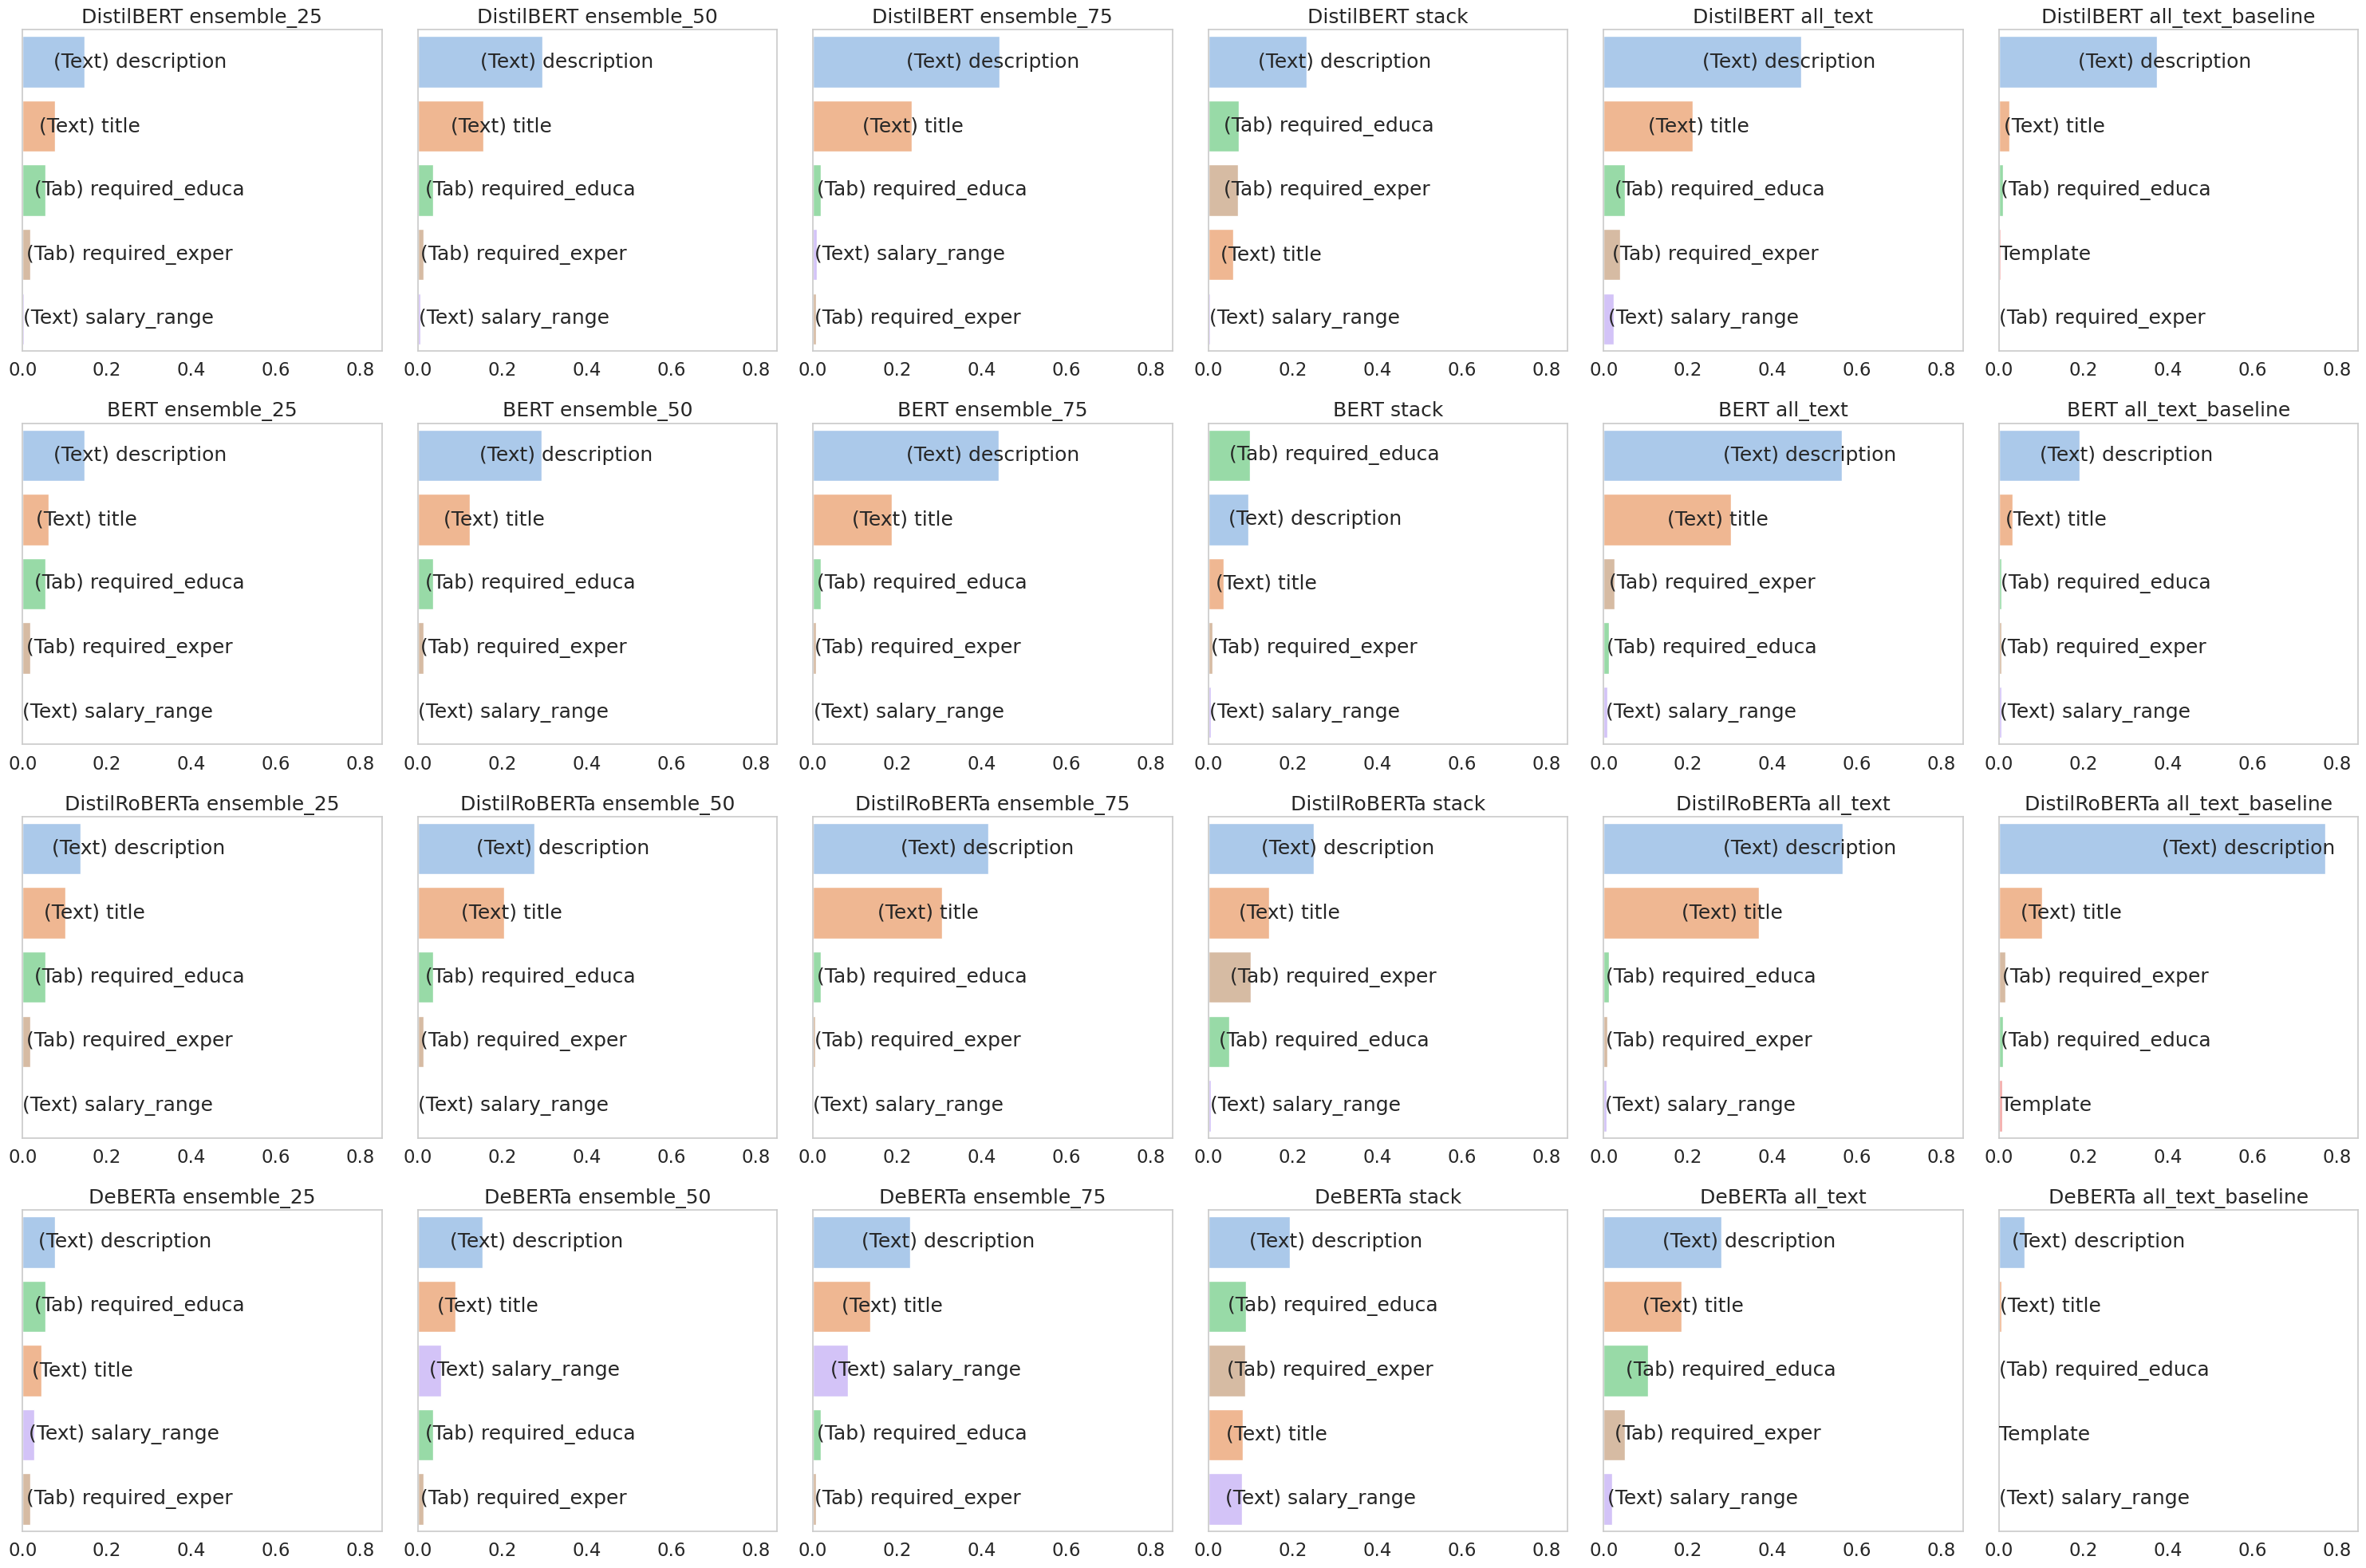

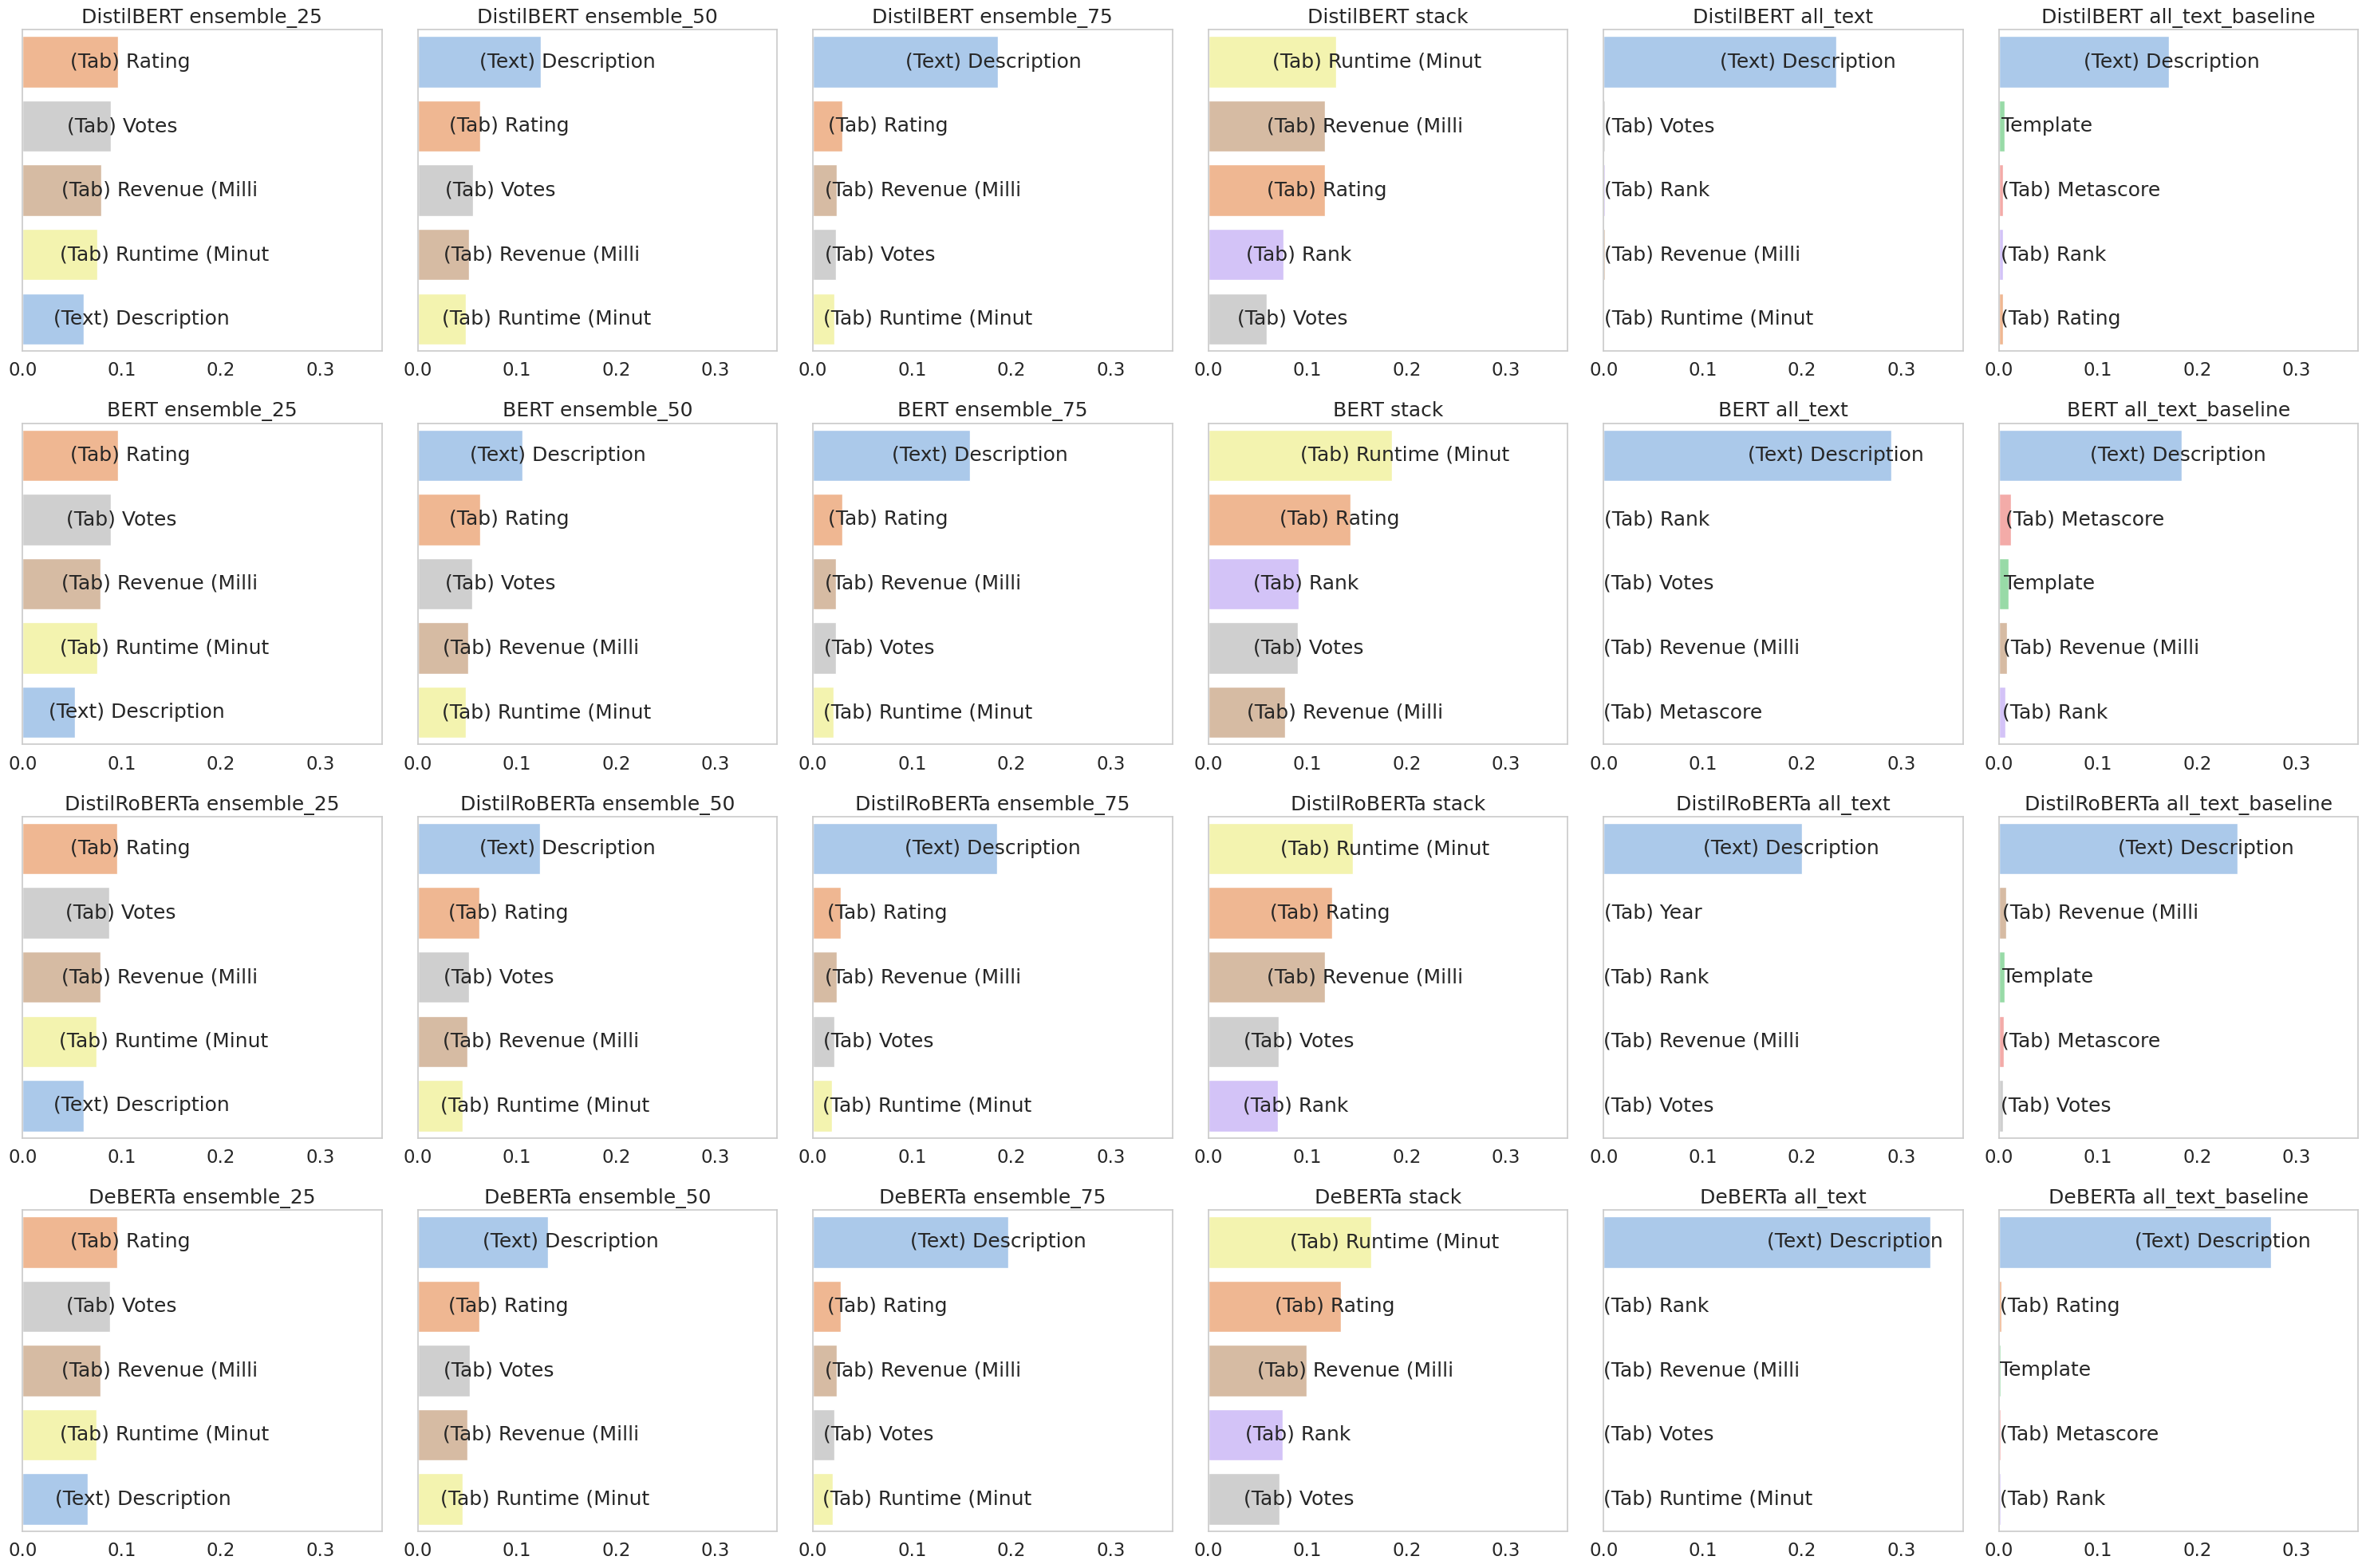

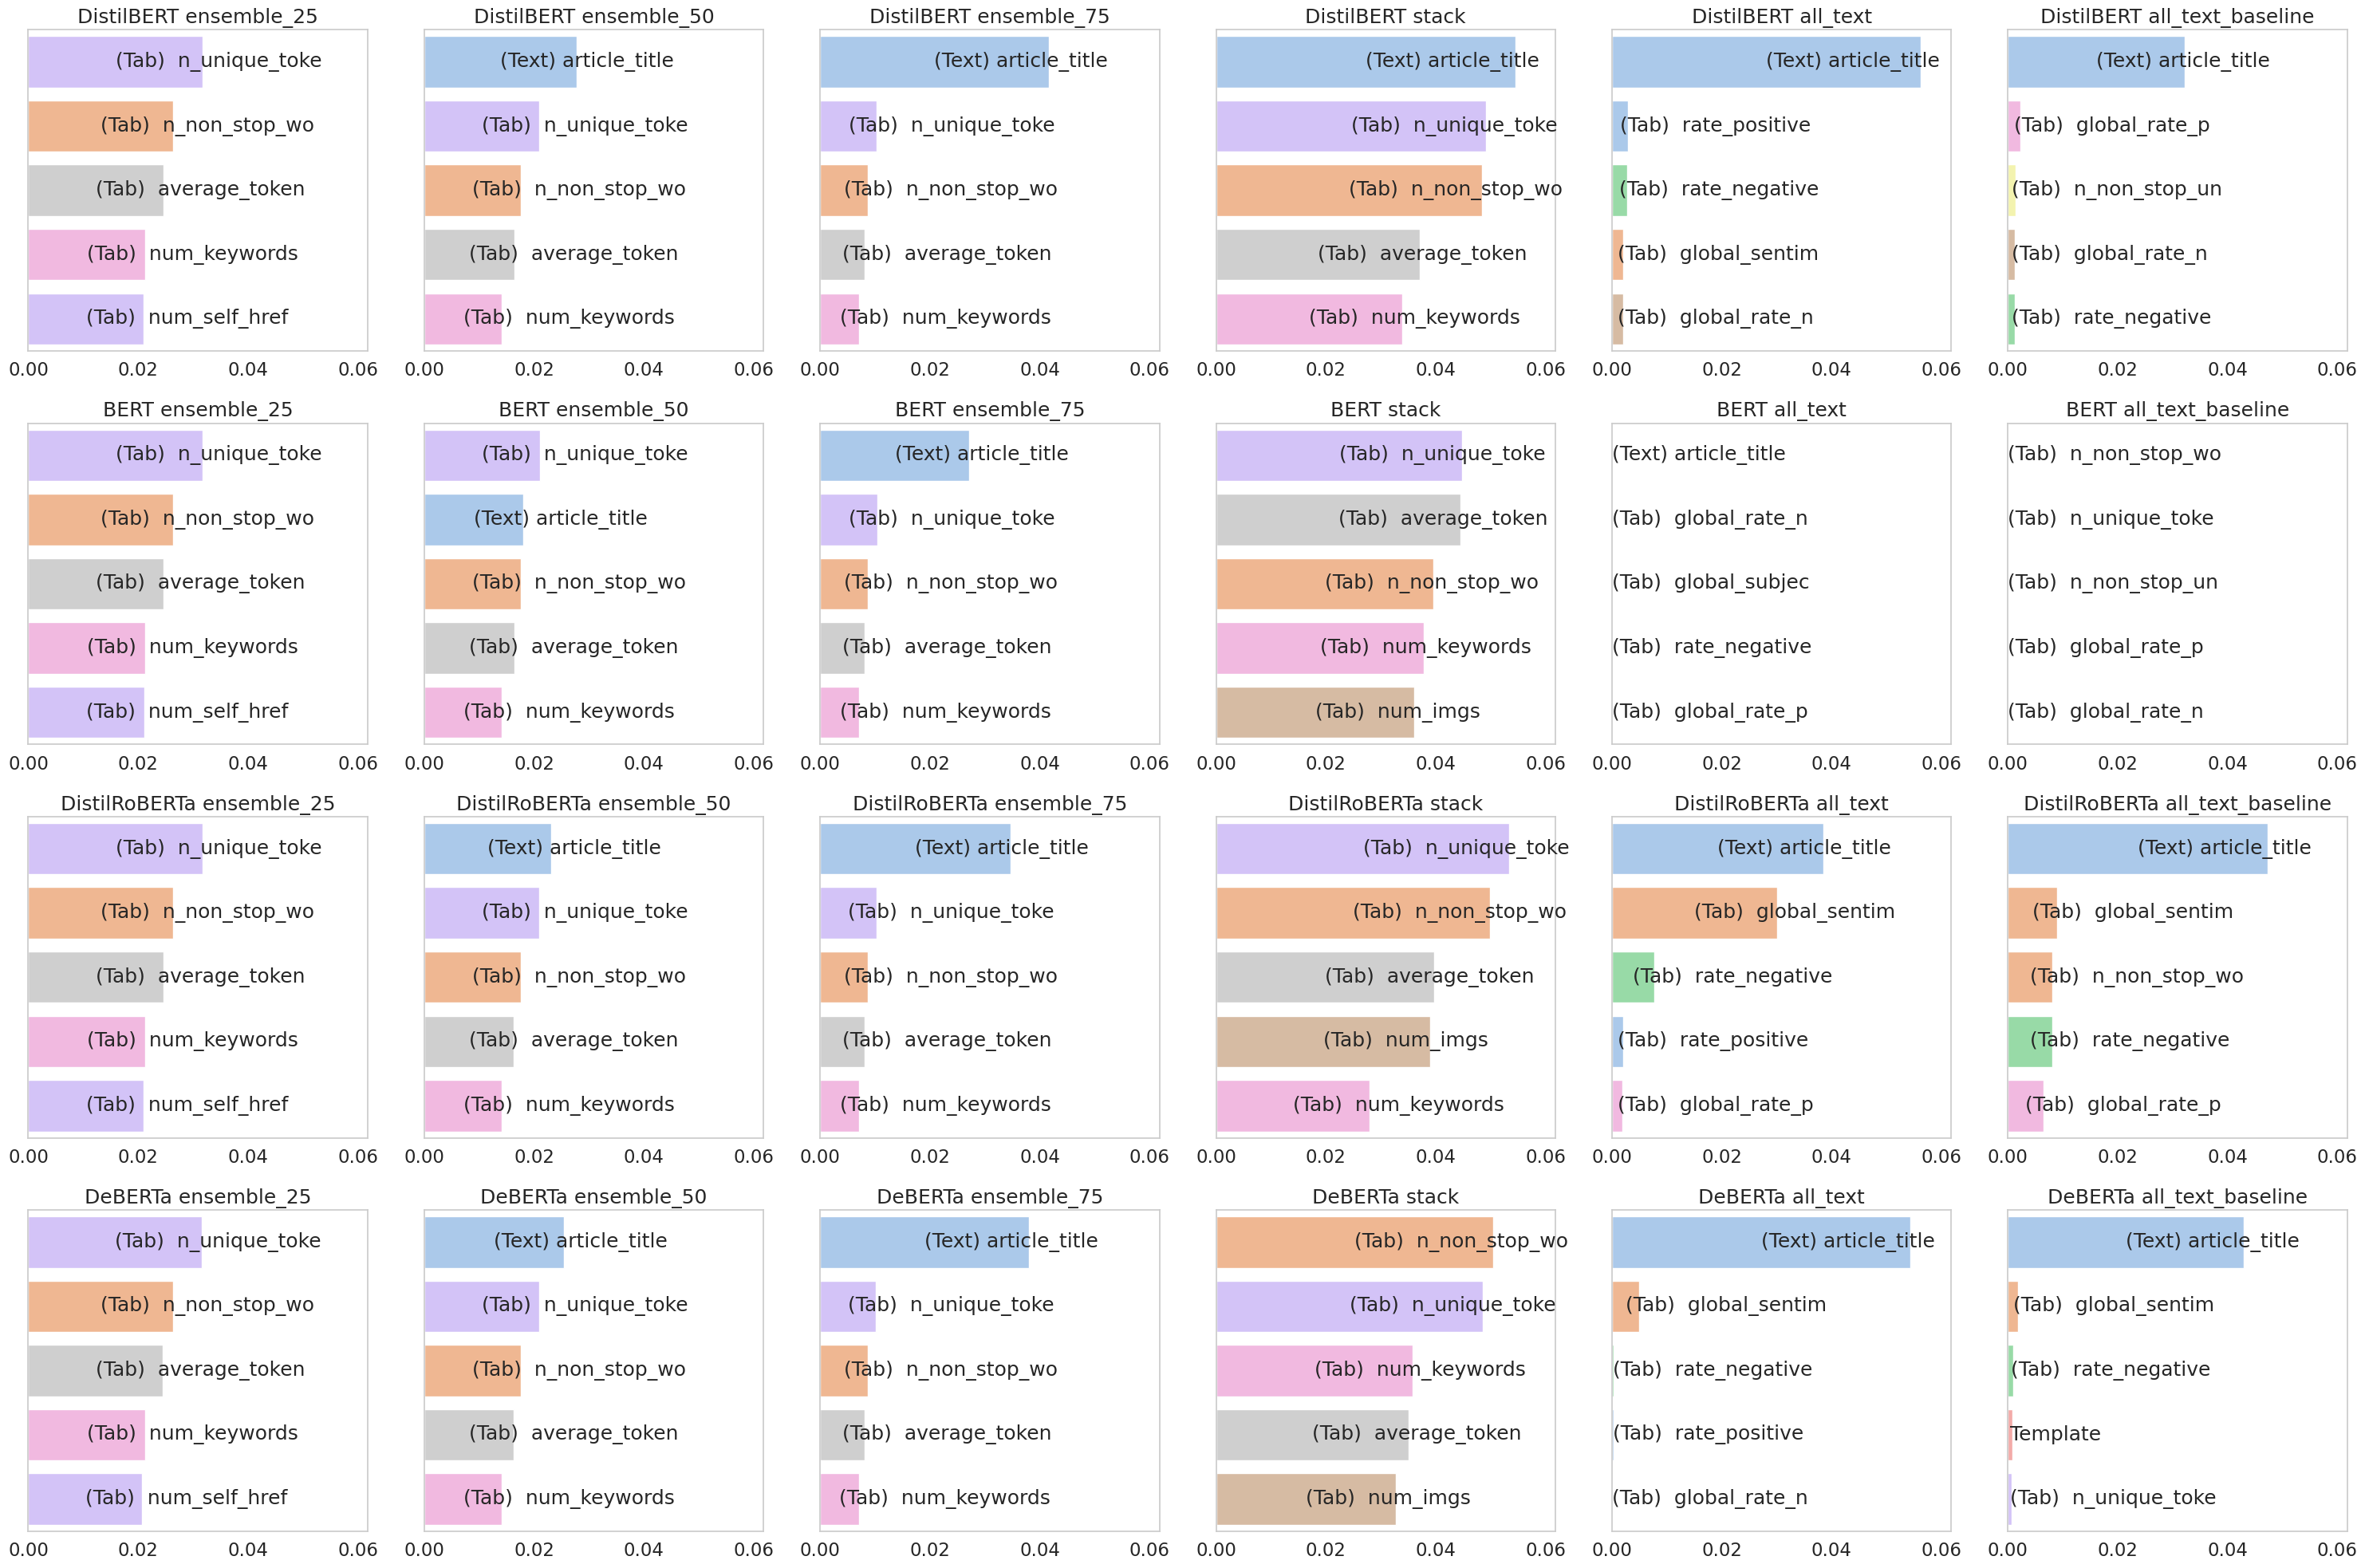

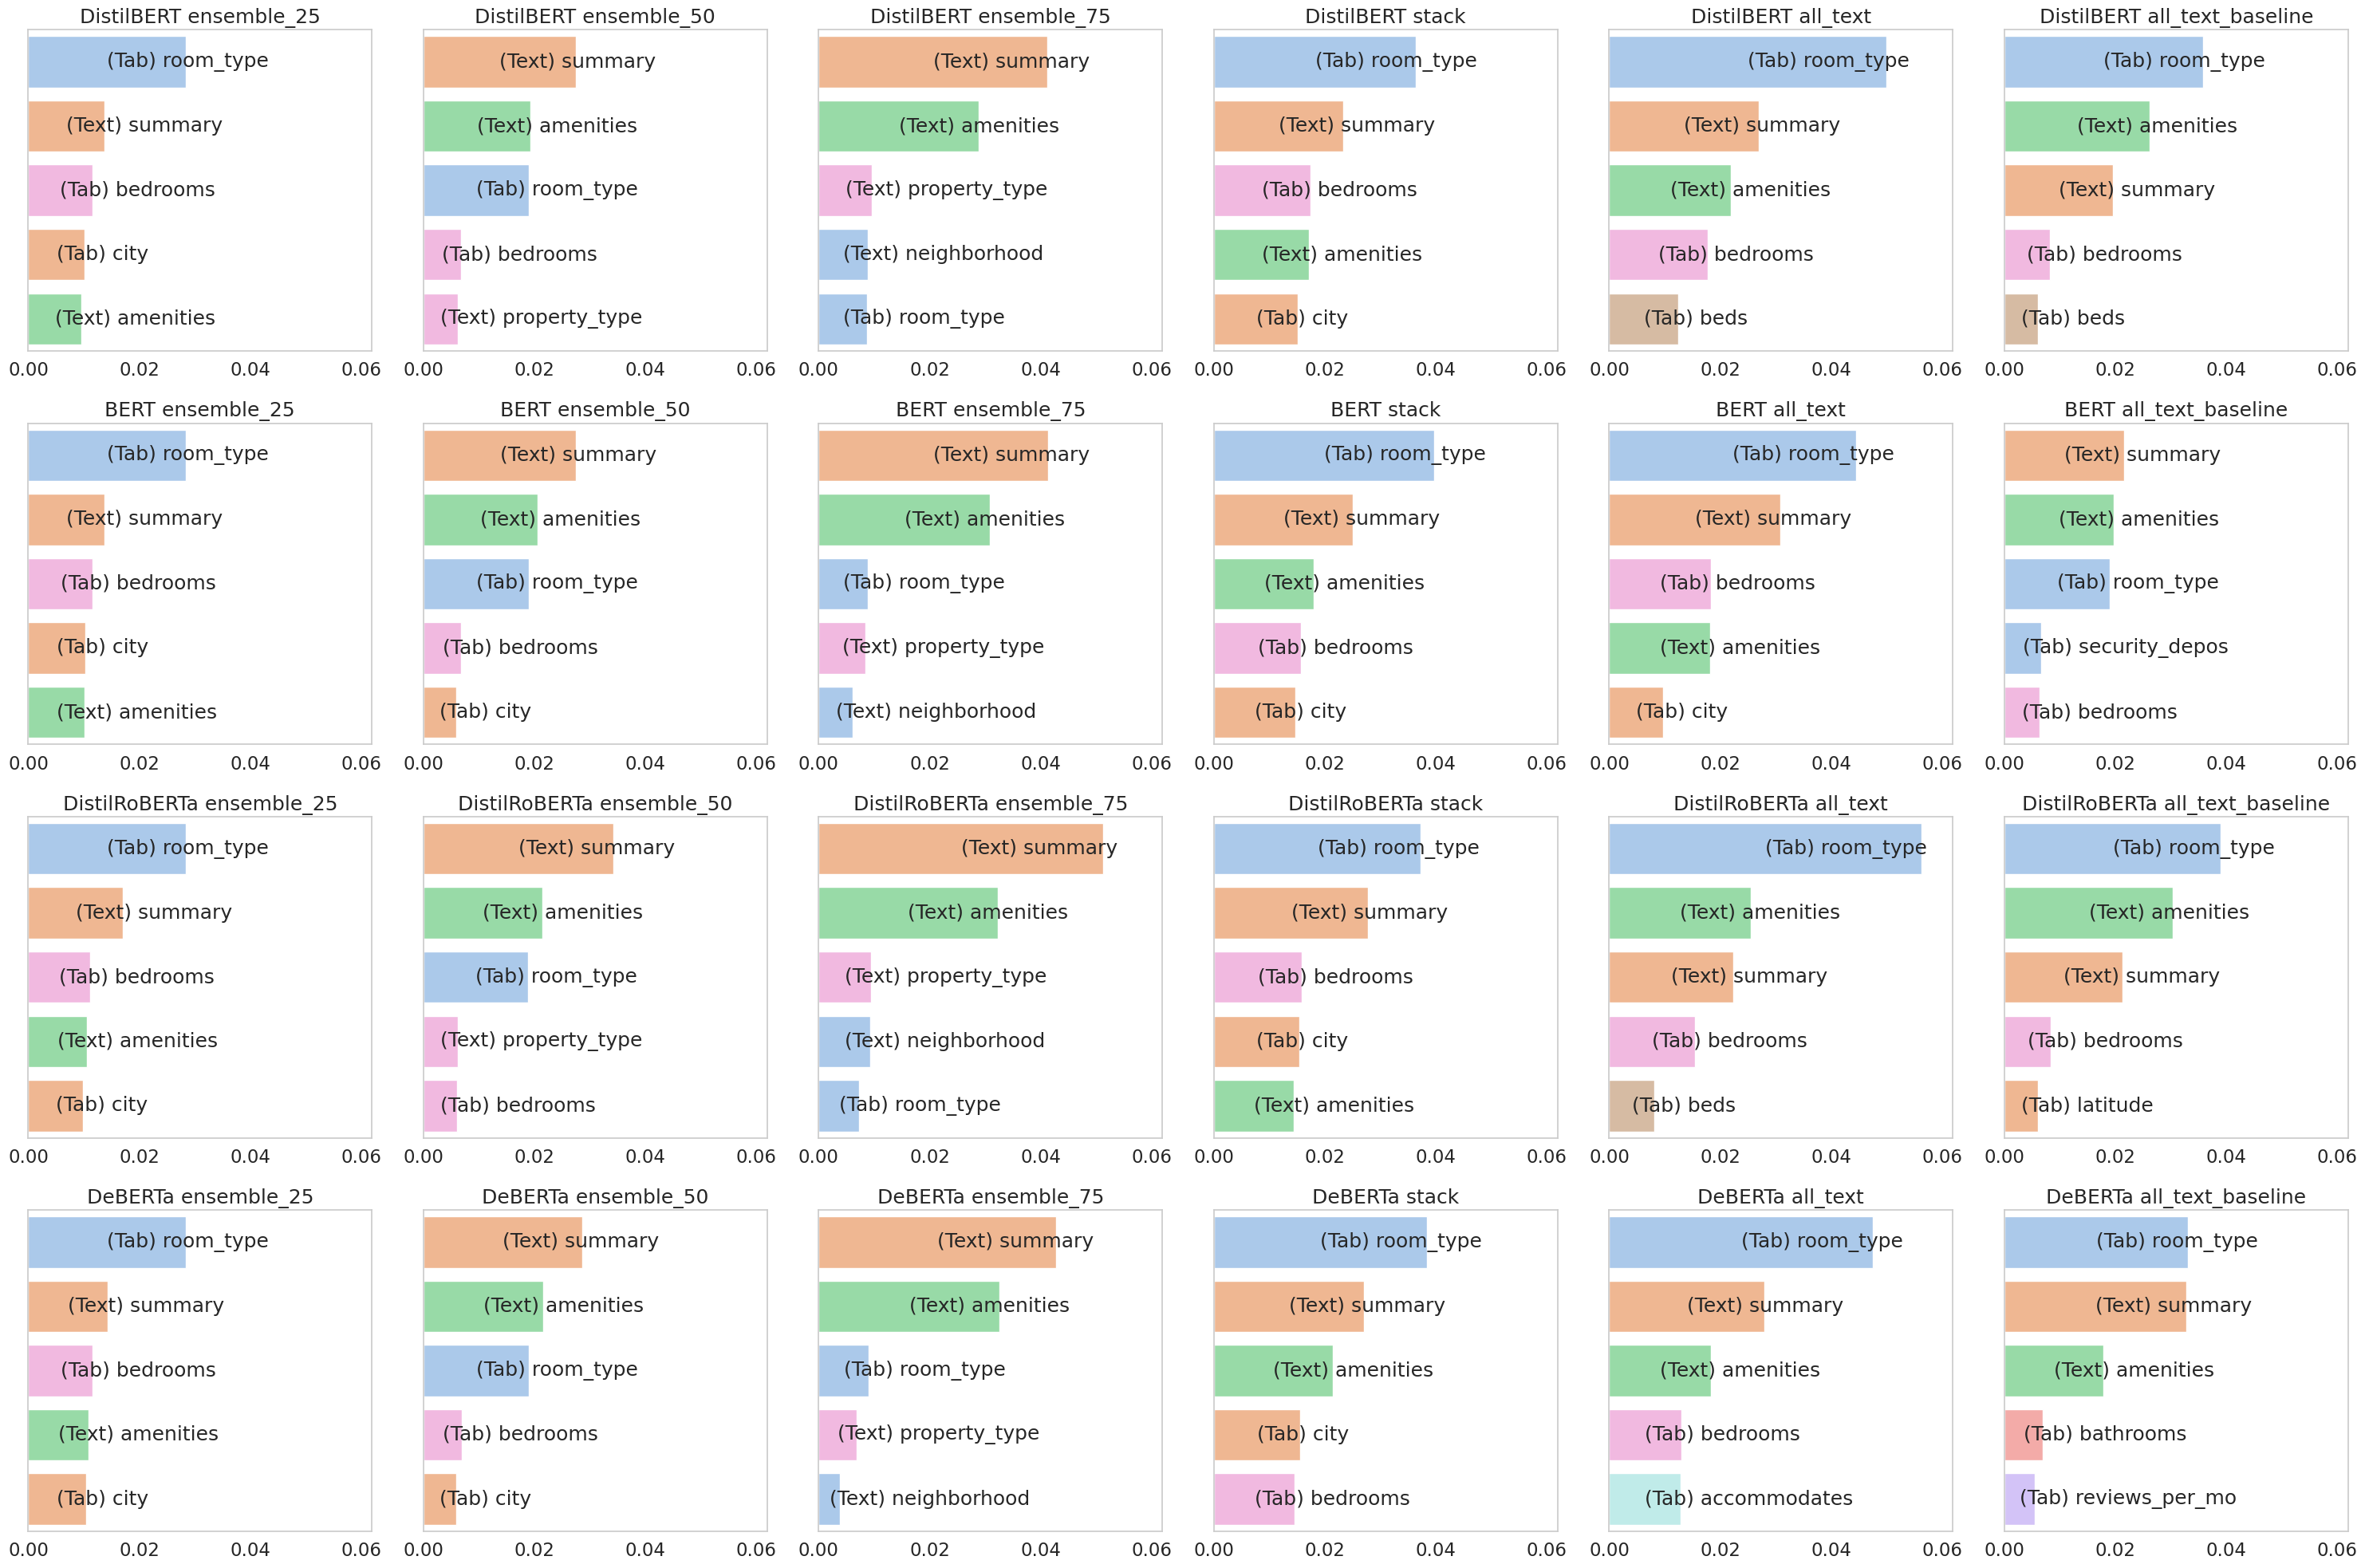

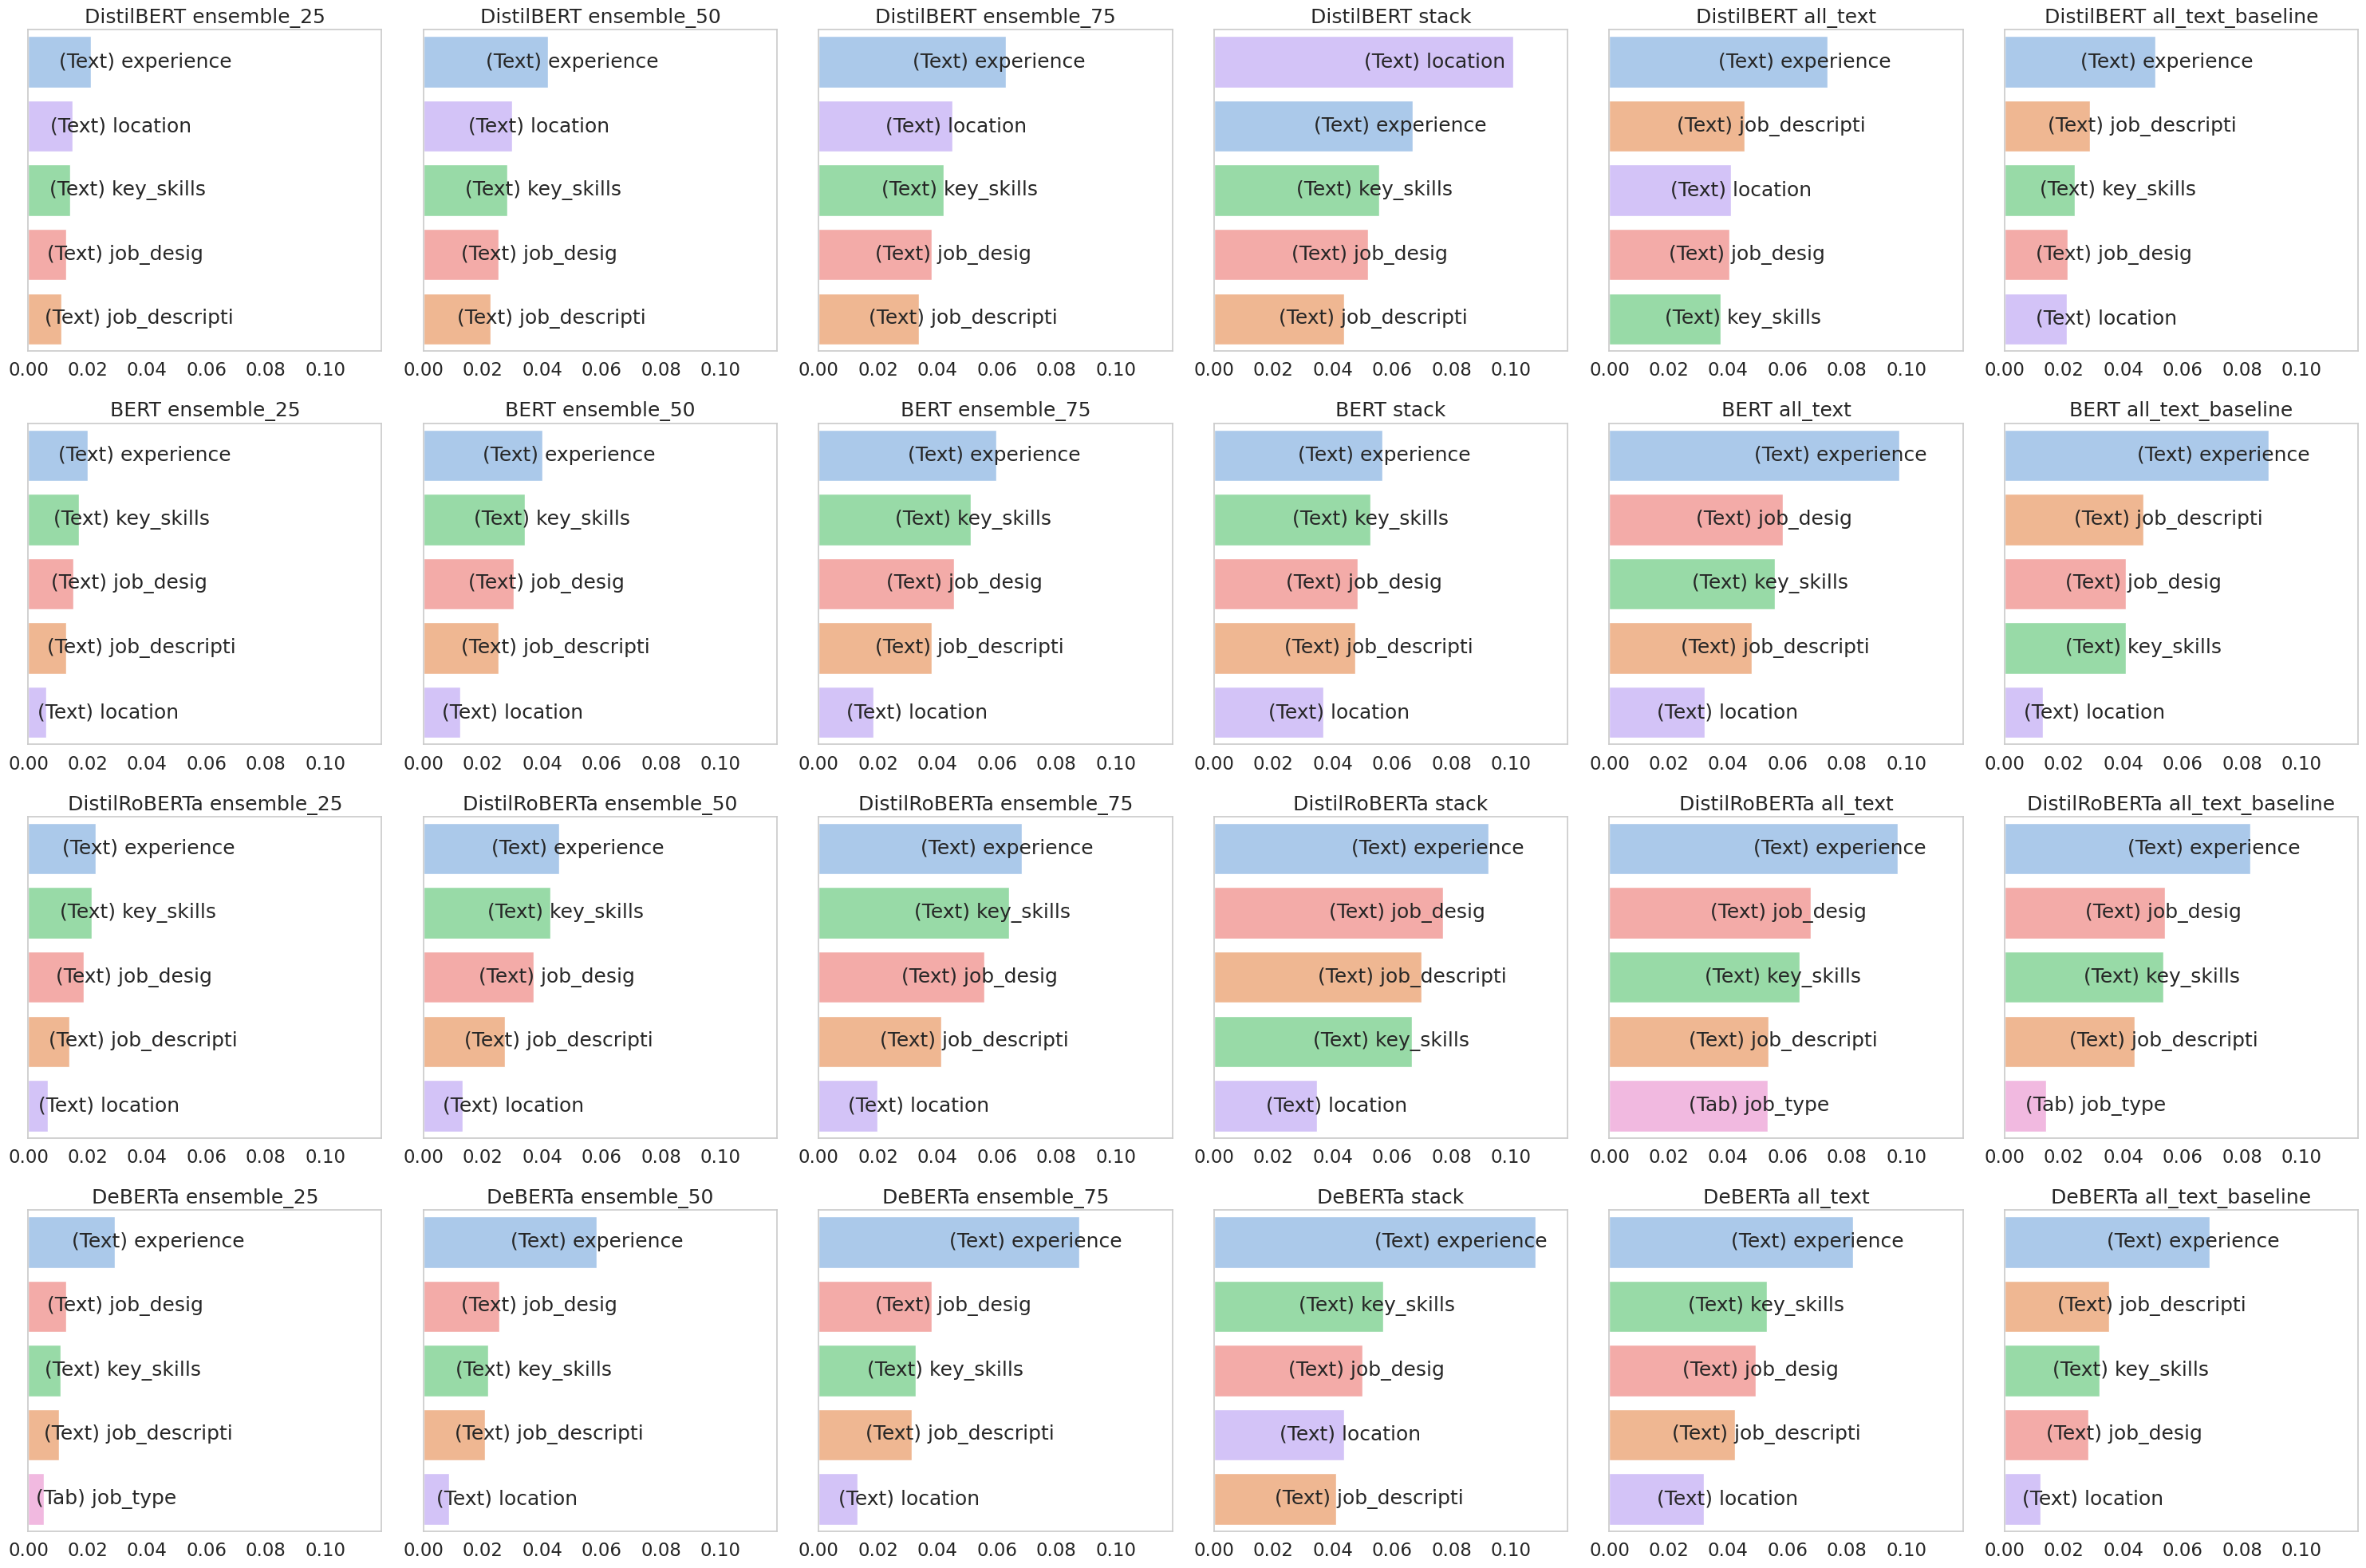

In [46]:
# for each ds_name do a grid of bar plots, 4 columns of text_model_code, 2 rows of name
ds_names = [
    "prod_sent",
    "kick",
    "jigsaw",
    "wine",
    "fake",
    "imdb_genre",
    "channel",
    "airbnb",
    "salary",
]
text_model_codes = ["disbert", "bert", "drob", "deberta"]
names = [
    "ensemble_25",
    "ensemble_50",
    "ensemble_75",
    "stack",
    "all_text",
    "all_text_baseline",
]
tmc_to_name = {
    "disbert": "DistilBERT",
    "bert": "BERT",
    "drob": "DistilRoBERTa",
    "deberta": "DeBERTa",
}
for ds_name in ds_names:
    # create a grid of bar plots
    # set the x axis scale to be the same for all plots
    fig, axs = plt.subplots(4, 6, figsize=(30, 20))
    max_val = 0
    # Iterate over text_model_codes and names
    for i, text_model_code in enumerate(text_model_codes):
        for j, name in enumerate(names):
            vals, cols = results[(text_model_code, ds_name, name)]
            max_val = max(max_val, max(vals))

    # Get the default color palette from Seaborn
    palette = sns.color_palette(
        "pastel",
        n_colors=len(cols),
    )
    all_cols = results[(text_model_code, ds_name, "all_text_baseline")][1]
    colour_dict = {col: palette[i] for i, col in enumerate(all_cols)}
    # Iterate over text_model_codes and names again to create charts
    for i, text_model_code in enumerate(text_model_codes):
        for j, name in enumerate(names):
            vals, cols = results[(text_model_code, ds_name, name)]
            df = pd.DataFrame({"Feature": cols[:5], "Importance": vals[:5]})
            ax = sns.barplot(
                x="Importance",
                y="Feature",
                data=df,
                ax=axs[i, j],
                palette=[
                    colour_dict.get(column, "gray") for column in cols[:5]
                ],  # Set colors based on the color dictionary
            )
            ax.set_title(f"{tmc_to_name[text_model_code]} {name}")
            ax.set_xlim(0, max_val + max_val * 0.1)

            # Hide x-axis and y-axis labels
            ax.set_xlabel("")
            ax.set_ylabel("")
            # Hide individual y-axis labels
            ax.set_yticklabels([])

            # Overlay row names in the middle of the bars
            for idx, patch in enumerate(ax.patches):
                width = patch.get_width()
                height = patch.get_height()
                x = patch.get_x()
                y = patch.get_y()
                ax.text(
                    x + width / 2,
                    y + height / 2,
                    cols[idx][:20],
                    ha="left",
                    va="center",
                )

    # Remove empty subplots and adjust spacing
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    # Show the plot
    plt.savefig(f"{ds_name}_combined_shap.png")
    plt.savefig(f"{ds_name}_combined_shap.pdf")
    plt.show()


## Mod then sum

In [52]:
# for each ds_name do a grid of bar plots, 4 columns of text_model_code, 2 rows of name
ds_names = [
    "prod_sent",
    "kick",
    "jigsaw",
    "wine",
    "fake",
    "imdb_genre",
    "channel",
    "airbnb",
    "salary",
]
text_model_codes = ["disbert", "bert", "drob", "deberta"]
names = [
    "ensemble_25",
    "ensemble_50",
    "ensemble_75",
    "stack",
    "all_text",
    "all_text_baseline",
]
tmc_to_name = {
    "disbert": "DistilBERT",
    "bert": "BERT",
    "drob": "DistilRoBERTa",
    "deberta": "DeBERTa",
}
sums = {}
for ds_name in ds_names:
    for i, text_model_code in enumerate(text_model_codes):
        for j, name in enumerate(names):
            vals, cols = results[(text_model_code, ds_name, name)]
            text_sum = 0
            tab_sum = 0
            template_sum = 0

            for val, col in zip(vals, cols):
                if "(Tab)" == col[:5]:
                    tab_sum += val
                elif "(Text)" == col[:6]:
                    text_sum += val
                elif "Template" in col:
                    template_sum += val
                else:
                    raise ValueError(f"Unknown column name {col}")
            sums[(text_model_code, ds_name, name)] = (text_sum, tab_sum, template_sum)

In [80]:
output_rows = [["", "", ""] + ds_names]
for i, text_model_code in enumerate(text_model_codes):
    output_row = [text_model_code]
    for j, name in enumerate(names):
        if j == 0:
            output_row.append(name)
        else:
            output_row = ["", name]
        text_sums = []
        tab_sums = []
        template_sums = []
        for k, ds_name in enumerate(ds_names):
            text_sum, tab_sum, template_sum = sums[(
                text_model_code, ds_name, name)]
            template_sum = '-' if template_sum == 0 else template_sum
            text_sums.append(text_sum)
            tab_sums.append(tab_sum)
            template_sums.append(template_sum)
            ta_div_tex = [ta/tex for ta, tex in zip(tab_sums, text_sums)]
            # print(f"{text_model_code} {name} {ds_name} {text_sum} {tab_sum} {template_sum}")
        for l, group in enumerate([template_sums, text_sums, tab_sums, ta_div_tex]):
            if name == "all_text_baseline":
                if l == 0:
                    output_row.append("Template")
                    output_row.extend(group)
                    output_rows.append(output_row)
                elif l == 1:
                    output_row = ["", "", "Text"]
                    output_row.extend(group)
                    output_rows.append(output_row)
                elif l == 2:
                    output_row = ["", "", "Tab"]
                    output_row.extend(group)
                    output_rows.append(output_row)
                elif l == 3:
                    output_row = ["", "", "Tab/Text"]
                    output_row.extend(group)
                    output_rows.append(output_row)
            else:
                if l == 0:
                    pass
                elif l == 1:
                    output_row.append("Text")
                    output_row.extend(group)
                    output_rows.append(output_row)
                elif l == 2:
                    output_row = ["", "", "Tab"]
                    output_row.extend(group)
                    output_rows.append(output_row)
                elif l == 3:
                    output_row = ["", "", "Tab/Text"]
                    output_row.extend(group)
                    output_rows.append(output_row)

In [81]:
# save to csv
import csv
with open('sums.csv', 'w', newline='') as csvfile:
    writer = csv.writer(
        csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for row in output_rows:
        writer.writerow(row)

In [65]:
text_sums

[0.05433661569535616,
 0.05452968731401365,
 0.013243360108463102,
 0.01956245588450974,
 0.2278449163159439,
 0.06204067041166126,
 0.013867128166214873,
 0.029595833180254813,
 0.0739155385715745]

In [66]:
[ta / tex for ta, tex in zip(tab_sums, text_sums)]


[2.9109390345187984,
 2.5827318932747168,
 0.6649097569693878,
 0.8731700402673052,
 0.3253845819920599,
 6.858434660107837,
 18.850291011756905,
 4.608822087287905,
 0.07096164371851084]

In [50]:
# this code sums the text, tabular and template shap values based off vals and cols
